In [3]:
#Ïú§Î¶¨Ï†Å Í≥†ÎØºÍ≥º Í∑úÏ†ú ÎèÑÏ†Ñ
# -Îî•ÌéòÏù¥ÌÅ¨, AIÎ™©ÏÜåÎ¶¨

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


driver=webdriver.Chrome()
driver.get("https://www.youtube.com/")
search_box = driver.find_element(By.NAME, 'search_query') # Í≤ÄÏÉâÏ∞ΩÏùÑ Ï∞æÏùÄ ÌõÑÏóê,
search_box.send_keys('AI ÎÖ∏Îûò Ï†ÄÏûëÍ∂å') # PythonÏù¥ÎùºÍ≥† ÏπòÍ≥†,
search_box.submit() # Í≤ÄÏÉâ Î≤ÑÌäº ÎàÑÎ¶Ñ
driver.find_element(By.XPATH,'//*[@id="filter-button"]/ytd-button-renderer/yt-button-shape/button').click()
driver.find_element(By.XPATH,'/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-search-filter-options-dialog-renderer/div[2]/ytd-search-filter-group-renderer[1]/ytd-search-filter-renderer[5]/a/div/yt-formatted-string').click() # Ïò¨Ìï¥
#driver.find_element(By.XPATH,'/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog/ytd-search-filter-options-dialog-renderer/div[2]/ytd-search-filter-group-renderer[1]/ytd-search-filter-renderer[4]/a/div').click() # Ïù¥Î≤à Îã¨




scroll_script = "window.scrollBy(0, window.innerHeight);"

# 20Ï¥à ÎèôÏïà Îß§ Ï¥àÎßàÎã§ Ïä§ÌÅ¨Î°§
for _ in range(1000):
    driver.execute_script(scroll_script)
    time.sleep(0.1)
    
result=driver.find_elements(By.ID, "video-title")
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [3]:
title_list = soup.select("#video-title")
title=[]
for i in range(len(title_list)) :
    if title_list[i].get("title") :
        title.append(title_list[i].get("title"))

In [4]:
import re
import pandas as pd
time=[]

for i in range(len(title_list)) :
    pattern = re.compile(r'(\d+)\s*(Í∞úÏõî|ÎÖÑ|Ïùº)\s*Ï†Ñ')
    matches = pattern.search(str(title_list[i]))
    try :
        time.append(matches.group())
    except :
        pass

result=pd.Series(time)

In [5]:
for i in list(result.values):
    if 'ÎÖÑ' in i :
        result.replace(i,int(i.split('ÎÖÑ')[0])*365,inplace=True)
    elif 'Í∞úÏõî' in i :
        result.replace(i,int(i.split('Í∞úÏõî')[0])*30,inplace=True)
    elif 'Ïùº' in i :
        result.replace(i,int(i.split('Ïùº')[0]),inplace=True)


In [6]:
result.info()

<class 'pandas.core.series.Series'>
RangeIndex: 519 entries, 0 to 518
Series name: None
Non-Null Count  Dtype
--------------  -----
519 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [7]:
# "Ïò¨Ìï¥"Î≤ÑÌäº ÌÅ¥Î¶≠ÌñàÏùÑ Îïå
test = result.value_counts().sort_index(ascending=False)
add=test[test.index < 30].sum(axis=0)
test.drop(test[test.index < 30].index,inplace=True)
test[0]=add
x=test.index
y=test.values

In [91]:
test

330     33
300     15
270     16
240     68
210     95
180     63
150     37
120     25
90      19
60      25
30      29
0      107
Name: count, dtype: int64

In [81]:
# "Ïù¥Î≤à Îã¨"Î≤ÑÌäº ÌÅ¥Î¶≠ÌñàÏùÑ Îïå
x=result.value_counts().sort_index(ascending=False).index
y=result.value_counts().sort_index(ascending=False).values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


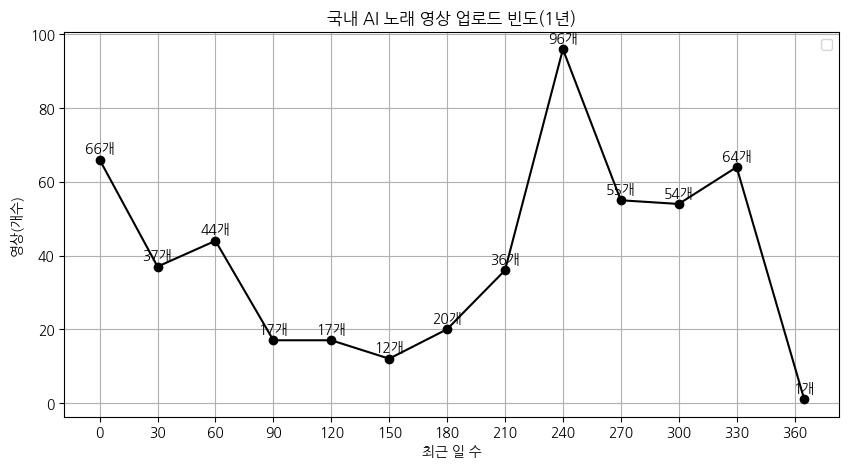

In [8]:
from matplotlib import pyplot as plt
import koreanize_matplotlib


plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', color='black')
plt.title('Íµ≠ÎÇ¥ AI ÎÖ∏Îûò ÏòÅÏÉÅ ÏóÖÎ°úÎìú ÎπàÎèÑ(1ÎÖÑ)')
plt.xlabel('ÏµúÍ∑º Ïùº Ïàò')
plt.ylabel('ÏòÅÏÉÅ(Í∞úÏàò)')
plt.grid(True)
plt.legend()
plt.xticks(range(0,390,30),range(0,390,30))
# Ï£ºÏöî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for i, txt in enumerate(y):
    plt.annotate(f'{txt}Í∞ú', (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


In [9]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def make_wordcloud(title_list, stopwords, word_count):
    okt = Okt()
    sentences_tag = []
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    path = r'c:\Windows\Fonts\malgun.ttf'
    img_mask = np.array(Image.open('musical-note.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                      background_color="white", max_font_size=200,
                      repeat=True, colormap='plasma',
                      mask=img_mask, collocations=False, max_words=50)

    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

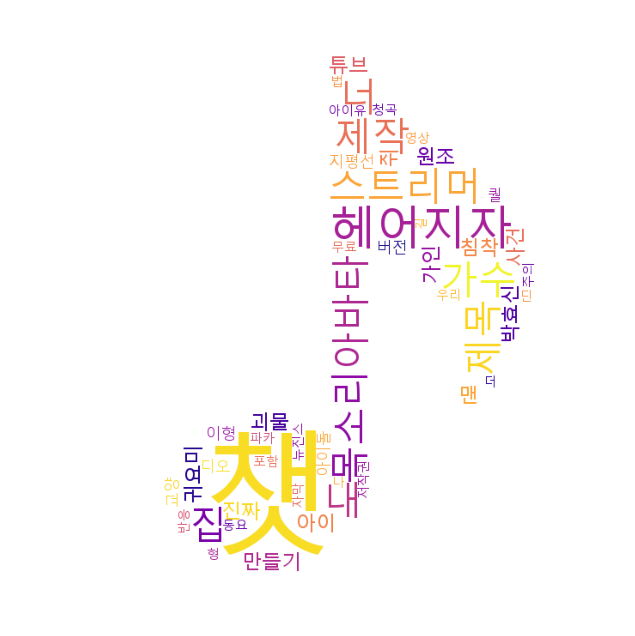

In [116]:
stopwords = ['AI','ÏùåÏïÖ','ÎÖ∏Îûò','ÏûëÍ≥°','Ïª§Î≤Ñ','Í≥°','Îßê','ÏõîÎìúÏªµ','Î°ú','Ïù¥','Í∞ÄÏÇ¨','ÏúÑ','Ïò•','ÏÇ¨Îûë','ÏûëÏÇ¨']
make_wordcloud(title, stopwords, 100)

In [117]:
title

['ÏµúÏ¥àÍ≥µÍ∞ú) Î∞ïÌö®Ïã†AIÍ∞Ä Î∂ÄÎ•¥Îäî "Í±∞Î¶¨ÏóêÏÑú"  (Í∞ÄÏÇ¨/Í≥†ÌÄÑ) | AIÏª§Î≤Ñ',
 'Í∞êÏä§Ìä∏ "AI Ïª§Î≤Ñ ÎÖ∏Îûò ÏõîÎìúÏªµ" Í∞úÏã†Í∏∞ÌïòÎÑ§.. + Í∞êÏä§Ìä∏ AIÏª§Î≤Ñ [23.8.15 Í∞êÏä§Ìä∏Ïùò ÏõîÎìúÏªµ]',
 'Ïä§ÌÉÄÌÅ¨ÎûòÌîÑÌä∏ ÏãúÏ¶àÌÉ±ÌÅ¨ AI - ÏÑúÏö∏Ïùò Îã¨ (ÍπÄÍ±¥Î™®)',
 'ÏûêÏûëÍ≥° „Ö£ AIÎπÖÎ±Ö - Falling Down',
 'ÏûêÏûëÍ≥°„Ö£AIÎπÖÎ±Ö - ÎÑàÏóêÍ≤åÎ°ú (To You)',
 'AI Í¥¥Î¨ºÏ•ê  - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî',
 'üñ§ [ùêèùê•ùêöùê≤ùê•ùê¢ùê¨ùê≠] Í∏∞Îã§Î¶¨Îã§ Î™ªÌï¥ ÏßÄÏ≥êÏÑú, ÎîòÏùÑ ÎßåÎì§Ïñ¥Î≤ÑÎ¶∞... Îîò(DEAN) AI ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏',
 'Í∞êÏä§Ìä∏AI ÎÖ∏Îûò ÏõîÎìúÏªµ Ìèº ÎØ∏Ï≥§Îã§!!„Öã„Öã',
 'Ïπ®Ï∞©Îß® - Stay with me (Official MV)',
 '[PLAYLIST] ÎÇ≠ÎßåÏûàÎäî Ïä§Ìä∏Î¶¨Î®∏Îì§Ïùò AI Ïª§Î≤Ñ 13Í≥°ÏùÑ ÌïúÎ≤àÏóê #1',
 'Î∞ïÏû¨Ï†ï ÎÖ∏Îûò ÎπºÏïóÎäî ÏïÑÏù¥Ïú† - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî „Ö£ ai cover',
 'ÎÇòÌûàÎã§ ai Ïª§Î≤Ñ) ÎÑàÏóêÍ≤å ÎÇú, ÎÇòÏóêÍ≤å ÎÑå',
 'AI Playlist Ïù¥ ÏÑ∏ÏÉÅ Î™®Îì† ÎÖ∏ÎûòÎ•º ÏïÑÏù¥Ïú† Î™©ÏÜåÎ¶¨Î°ú Îì£Í≥† Ïã∂Ïñ¥üìÄ [AI Cover]',
 'Ïä§ÌÉÄÌÅ¨ÎûòÌîÑÌä∏ Î©îÎîï AI - 8282 (Feat. Îã§ÎπÑÏπò)',
 

In [1]:
title=['ÏµúÏ¥àÍ≥µÍ∞ú) Î∞ïÌö®Ïã†AIÍ∞Ä Î∂ÄÎ•¥Îäî "Í±∞Î¶¨ÏóêÏÑú"  (Í∞ÄÏÇ¨/Í≥†ÌÄÑ) | AIÏª§Î≤Ñ',
 'Í∞êÏä§Ìä∏ "AI Ïª§Î≤Ñ ÎÖ∏Îûò ÏõîÎìúÏªµ" Í∞úÏã†Í∏∞ÌïòÎÑ§.. + Í∞êÏä§Ìä∏ AIÏª§Î≤Ñ [23.8.15 Í∞êÏä§Ìä∏Ïùò ÏõîÎìúÏªµ]',
 'Ïä§ÌÉÄÌÅ¨ÎûòÌîÑÌä∏ ÏãúÏ¶àÌÉ±ÌÅ¨ AI - ÏÑúÏö∏Ïùò Îã¨ (ÍπÄÍ±¥Î™®)',
 'ÏûêÏûëÍ≥° „Ö£ AIÎπÖÎ±Ö - Falling Down',
 'ÏûêÏûëÍ≥°„Ö£AIÎπÖÎ±Ö - ÎÑàÏóêÍ≤åÎ°ú (To You)',
 'AI Í¥¥Î¨ºÏ•ê  - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî',
 'üñ§ [ùêèùê•ùêöùê≤ùê•ùê¢ùê¨ùê≠] Í∏∞Îã§Î¶¨Îã§ Î™ªÌï¥ ÏßÄÏ≥êÏÑú, ÎîòÏùÑ ÎßåÎì§Ïñ¥Î≤ÑÎ¶∞... Îîò(DEAN) AI ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏',
 'Í∞êÏä§Ìä∏AI ÎÖ∏Îûò ÏõîÎìúÏªµ Ìèº ÎØ∏Ï≥§Îã§!!„Öã„Öã',
 'Ïπ®Ï∞©Îß® - Stay with me (Official MV)',
 '[PLAYLIST] ÎÇ≠ÎßåÏûàÎäî Ïä§Ìä∏Î¶¨Î®∏Îì§Ïùò AI Ïª§Î≤Ñ 13Í≥°ÏùÑ ÌïúÎ≤àÏóê #1',
 'Î∞ïÏû¨Ï†ï ÎÖ∏Îûò ÎπºÏïóÎäî ÏïÑÏù¥Ïú† - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî „Ö£ ai cover',
 'ÎÇòÌûàÎã§ ai Ïª§Î≤Ñ) ÎÑàÏóêÍ≤å ÎÇú, ÎÇòÏóêÍ≤å ÎÑå',
 'AI Playlist Ïù¥ ÏÑ∏ÏÉÅ Î™®Îì† ÎÖ∏ÎûòÎ•º ÏïÑÏù¥Ïú† Î™©ÏÜåÎ¶¨Î°ú Îì£Í≥† Ïã∂Ïñ¥üìÄ [AI Cover]',
 'Ïä§ÌÉÄÌÅ¨ÎûòÌîÑÌä∏ Î©îÎîï AI - 8282 (Feat. Îã§ÎπÑÏπò)',
 'Ïã†ÌòïÎßå(Ïß±Íµ¨ ÏïÑÎπ†)  - Ìòï(AI Cover)',
 'Ìä∏ÎüºÌîÑÍ∞Ä Îû©ÌïòÍ≥† Ïπ∏ÏòàÍ∞Ä Ïò§Î•¥ÎßâÍ∏∏ Î∂ÄÎ•¥Îäî ÏÑ∏Í≥ÑÍ¥Ä | Î≤†Ïä§Ìä∏ AI Ïª§Î≤Ñ ÏùåÏïÖ ÏõîÎìúÏªµ',
 'üî¥ÏÜåÎ¶ÑÏ£ºÏùòüî¥ÏãúÏ≤≠Ïûê Î™®ÎëêÍ∞Ä ÎÜÄÎûÄ ÍπÄÏû¨Ïõê AIÎ≥¥Ïª¨ ÏΩòÌÖåÏä§Ìä∏„Ñ∑„Ñ∑',
 'ÎèôÏàòÏπ∏Ïùò AI ÎÖ∏Îûò Ïª§Î≤ÑÎ•º Îì§ÏùÄ Ïä§Ìä∏Î¶¨Î®∏Îì§Ïùò Î∞òÏùë',
 'Ïù¥ ÎÖ∏Îûò Îã§Îì§ ÏïÑÏãúÏ£†? AIÎ∞ïÌö®Ïã†Ïùò "ÏÇ≠Ï†ú"',
 '[IU]ÏïÑÏù¥Ïú† (feat.G-DRAGON) - Ìïú Ïó¨Î¶ÑÎ∞§Ïùò ÍøÄ ai Cover (Ï∂îÏ≤úÍ≥°) Í≥†ÌÄÑÏ£ºÏùò',
 'Ìï¥Ïô∏ÏóêÏÑú ÎÇúÎ¶¨ÎÇú AIÎ°ú 5Î∂ÑÎßåÏóê ÎÖ∏ÎûòÎ•º ÎßåÎì§Ïñ¥ÏÑú ÎèàÏùÑ Î≤ÑÎäî Î∞©Î≤ï | Ïú†ÌäúÎ∏å ÏûêÎèôÌôî',
 'Í∏∞Í≥ÑÏóêÍ≤å ÏòÅÌòºÏùÑ ÎπºÏïóÍ∏¥ Ïä§Ìä∏Î¶¨Î®∏ Î™®ÏùåÏßë | Î≤†Ïä§Ìä∏ AI Ïª§Î≤Ñ ÏùåÏïÖ ÏõîÎìúÏªµ(Ïä§Ìä∏Î¶¨Î®∏ Ver.)',
 'AIÏùåÏïÖÏúºÎ°ú ÏàòÏùµÏ∞ΩÏ∂ú, ÏßÑÏßúÏùºÍπå? - Ï†ÄÏûëÍ∂åÏùò ÎπÑÎ∞Ä',
 'AIÎ¨¥ÌòÑ - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî',
 'Ai ÏïÑÎ£® Cover. / Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî - Î∞ïÏû¨Ï†ï',
 'Í∞êÎèôÏ†ÅÏù∏ Ïä§Ìä∏Î¶¨Î®∏ AI Ïª§Î≤Ñ ÏõîÎìúÏªµ',
 'ÎùºÎîîÏú†Ïùò ÌÇ¨ÎßÅÎ≥¥Ïù¥Ïä§Î•º ÎÖ∏ÎûòÎ°ú![AIÎÖ∏Îûò]„Ö£ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ†,Î≤†Îç∏Í∏∞Ïö∞Ïä§,Cupid Îì±',
 'ÏïÑÏù¥Ïú†(IU) - Ïñ¥ÎîîÏóêÎèÑ [Í∞ÄÏÇ¨ Ìè¨Ìï®] (AI Cover)',
 'Î±ÖÌÅ¨-Í∞ÄÏßàÏàòÏóÜÎäî ÎÑà (ÌîÑÎ†àÎîî Î®∏ÌÅêÎ¶¨ AI Ïª§Î≤Ñ)',
 'ÍπÄÎèôÎ•†AI - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî (Í≥†ÌÄÑÏ£ºÏùò)',
 'AIÎÖ∏ÎûòÎßåÎì§Ïñ¥ÏÑú Ïõî Î∞±ÎßåÏõê Ïó∞Í∏àÌÉÄÍ∏∞ I  ÏàòÎÖ∏ÏóêÏù¥ÏïÑÏù¥ÏôÄ Ï±óÏßÄÌîºÌã∞Î°ú ÏãúÏûëÌïòÎäî ÏùåÏïÖÏ†úÏûë Î∞è ÏàòÏùµÌôî / SUNO AI perfect guide',
 'Í∞ÄÏàò Ïò•ÎÉ•Ïî®Îäî ÎÇòÍ∞ÄÏûàÏñ¥ÔΩúÏä§Ìä∏Î¶¨Î®∏ AI ÎÖ∏Îûò ÏõîÎìúÏªµ',
 '(Í≥†Ï£† ÏÇ¨ÌÜ†Î£® AI Cover) Ìë∏Î•¥Î¶ÑÏù¥ ÏÇ¨Îäî Í≥≥ : Ï£ºÏà†ÌöåÏ†Ñ - ÌöåÏò•„ÉªÏò•Ï†à OP',
 'ÌíÄÎ≤ÑÏ†Ñ - AIÏö©Ï§ÄÏ¢åÏùò ‚ÄúÌó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî‚Äú',
 'AI ÏûëÍ≥° 30Ï¥àÏª∑! ÌéòÏù¥Ïä§Î∂Å Î©îÌÉÄÍ∞Ä ÎßåÎì† AI ÏùåÏïÖ ÌîÑÎ°úÍ∑∏Îû® MusicGEN Îàà ÏïûÏóêÏÑú Í≥° ÎßåÎì§Ïñ¥ÎìúÎ¶ΩÎãàÎã§! ÏùºÎã® Îì£Í≥† Í∞ÄÏÑ∏Ïöî~!!! Ïú†ÌäúÎ∏å #Î¨¥Î£åÏùåÏïÖ, Ï†ÄÏûëÍ∂å, ÏãπÎã§ Î¨¥Î£å„Öã„Öã„Öã',
 'AI Í¥¥Î¨ºÏ•ê - Ïò§ÎûòÎêú ÎÖ∏Îûò',
 'Ïò•ÎÉ•Ïù¥ ai ÏõîÎìúÏªµ / RoofTopCat AI Songs Cover World Cup',
 '[AIÏª§Î≤Ñ] Î∞ïÎ™ÖÏàò - New Jeans | Îâ¥ÏßÑÏä§ - New Jeans AI COVER',
 'Ï†ÑÌôîÎÖ∏ÎûòÎ∞©Ïã§ÏãúÍ∞ÑÎßõÏßë  #AIÏûêÎèôÎÖ∏ÎûòÌÇ§ #Î¨¥Î£åÏïÖÎ≥¥  0214',
 'DEAN(Îîò) - Newjeans (Cover) AI',
 'ÏöîÏ¶ò ÌôîÏ†úÏù∏ Ïï†Îãà Ïò§ÌîÑÎãùÍ≥° | Bling-Bang-Bang-Born - Creepy Nuts | ÎßàÏäê 2Í∏∞ OP [Í∞ÄÏÇ¨/Ìï¥ÏÑù/AMV]',
 'ÌïòÎã§ÌïòÎã§ Î∞∞ÌãÄÌÅ¨Î£®Ï†ÄAIÍπåÏßÄ „Öã„Öã„Öã',
 'DramaÍ∞Ä ITZY ÎÖ∏ÎûòÏòÄÎã§Î©¥ (ai cover) #shorts',
 'ÏúàÌÑ∞ - ÏÇ¨ÎûëÌïòÏßÄ ÏïäÏïÑÏÑú Í∑∏Îû¨Ïñ¥ (ÏõêÍ≥°:ÏûÑÌïúÎ≥Ñ) | aespa winter cover',
 'ÎîîÏò§ & Î∞±ÌòÑ (EXO) - TO.X‚îÇÌÉúÏó∞ ÏõêÍ≥°‚îÇAI COVER‚îÇÍ∞ÄÏÇ¨Ìè¨Ìï®‚îÇÌÇ§ÎÇ¥Î¶º‚îÇÏã†Ï≤≠Í≥°‚îÇ#ÎîîÏò§ #dokyungsoo #Î∞±ÌòÑ #baekhyun #ÏóëÏÜå #exo #ÌÉúÏó∞ #aicover',
 '„ÄéÍ≤¨ÏûêÌù¨„Äè AI Ïä§Ìä∏Î¶¨Î®∏ ÏõîÎìúÏªµ „Ö†„Ö†„Ö†„Ö† ÎØ∏Ï≥§Îã§ ÎØ∏Ï≥§Ïñ¥ „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†',
 '„ÄêÌó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî„ÄëÎÑ§Î£® AI Cover (ÏõêÍ≥° : Î∞ïÏû¨Ï†ï) [Î∏îÎ£® ÏïÑÏπ¥Ïù¥Î∏å]',
 'Î≤åÏ≥ê AI -  ÏûòÎ™ªÎêú ÎßåÎÇ® (Ìï†ÎØ∏ÎÑ¥) / Ï†ÑÍµ≠ ÎÖ∏ÎûòÏûêÎûë',
 '16ÎÖÑ Î∞ïÌö®Ïã†ÏùÑ ÌïôÏäµÌïú AI - "Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî" (ÏµúÎã§ÏöîÏ≤≠Í≥°**)',
 'AI Í¥¥Î¨ºÏ•ê - Í≤®Ïö∏ÏùÑ Í±∑ÎäîÎã§ (Ïú§Îî¥Îî¥)‚îÉAi cover',
 'ÏßÑÏßúÎ≥¥Îã§ Îçî ÏßÑÏßúÍ∞ôÏùÄ Ai ÎÖ∏Îûò...„Ñ∑„Ñ∑',
 'Ïò§Î•¥ÎßâÍ∏∏- ÌîÑÎ†àÎîî Î®∏ÌÅêÎ¶¨(AI COVER)',
 'Ïú§Ìïò(YOUNHA) - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ† | AI Cover - ÌÖêÎèÑ ÏïÑÎ¶¨Ïä§ Â§©Á´• „Ç¢„É™„Çπ (Ïã±ÌÅ¨ ÏôÑÌôî)',
 'AI ÎûÑÎ°ú - Ìù∞ Îàà‚îÉAi cover',
 '(Ìò∏ÏãúÎÖ∏ ÏïÑÏù¥ AI COVER) ÏïÑÏù¥Îèå - YOASOBI',
 '[ÎÇòÏùò ÏïÑÏ†ÄÏî®ost] Î≥ÑÏù¥ Îêú Í∑∏Î•º Í∏∞Î¶¨Î©∞ "AIÎ∞ïÌö®Ïã† - Ïñ¥Î•∏"',
 'ÏûÑÏû¨Î≤î - Ïã¨(ÂøÉ) ‚îÇ DK(ÎîîÏÖàÎ≤Ñ) Î≤ÑÏ†Ñ ÏñÄ ÏõêÍ≥° ‚îÇ Yim Jae-beum (AI voice cover)',
 'ÏûëÍ≥°ÌïúÎã§Í≥† ÏÜåÍ∞úÌïòÎçîÎãà Î∞∞Í≤ΩÏùåÏïÖÏö©?? ÌòÑÏã§Ï†ÅÏúºÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏûëÍ≥°AI ÏÜåÍ∞úÌï©ÎãàÎã§.',
 'AIÏπ®Ï∞©Îß®Ïù¥ Î¶¨ÎßàÏä§ÌÑ∞Ìïú Í≥†Î∞±‚ô™ - Îç∏Î¶¨Ïä§ÌååÏù¥Ïä§',
 'ÏïÑÏù¥Ïú†IU - ÌÅêÌîºÎìú (Feat. ÎìúÎ†àÏù¥ÌÅ¨) | AI Cover',
 'üéπ ÎîîÏò§ (EXO) - Get A Guitar‚îÇÎùºÏù¥Ï¶à (RIIZE) ÏõêÍ≥°‚îÇAI COVER‚îÇÍ∞ÄÏÇ¨Ìè¨Ìï®‚îÇÏã†Ï≤≠Í≥°‚îÇ#ÎîîÏò§ #ÎèÑÍ≤ΩÏàò #dokyungsoo #riize #ÎùºÏù¥Ï¶à #aicover',
 '(Ïä§Ïø†ÎÇò AI cover) SPECIALZ : Ï£ºÏà†ÌöåÏ†Ñ ÏãúÎ∂ÄÏïº ÏÇ¨Î≥Ä OP',
 "Î∞±ÌòÑ BAEKHYUN 'To. X' ÌÉúÏó∞ TAEYEON (AI Cover)",
 'Ïπ®Ï∞©Îß® - ÎÖ∏ÎûòÎ∞©ÏóêÏÑú (ON THE K : LIVE | AI COVER | ÏõêÍ≥° Ïû•Î≤îÏ§Ä)',
 'Í∞àÎïåÍπåÏßÄ Í∞ÄÎ≤ÑÎ¶∞ AI Í∑ºÌô©',
 'DEAN(Îîò) - Newjeans (Cover) AI',
 'AIÎÇ®ÎèÑÏùº - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî',
 'ÎÇ¥ Î™©ÏÜåÎ¶¨Î°ú ÎßåÎì† AI ÎÖ∏Îûò ÏàòÏ§Äü§£',
 'Ï†ÄÏûëÍ∂å Î¨∏Ï†úÏóÜÎäî AIÏùåÏïÖ ÎßåÎì§Ïñ¥ ÏàòÏùµÏ∞ΩÏ∂úÍπåÏßÄ ÌïòÎäî Î∞©Î≤ï',
 'Ïò§Ïä§Ìã¥ AI - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî (Í≥†ÌÄÑÏ£ºÏùò)',
 'AIÎ©îÎîï ÎàÑÎÇò - ÌçºÌéôÌä∏ ÎÇòÏûá (Î•¥ÏÑ∏ÎùºÌïå)',
 'Í¥¥Î¨ºÏ•ê - Í∑∏Îü∞ ÏùºÏùÄ Cover (ÏõêÍ≥°: Î∞ïÌôîÏöîÎπÑ)',
 'Î∞ïÌö®Ïã†(AI) - Ïò§ÎûòÎêú ÎÖ∏Îûò (ÍπÄÎèôÎ•†)',
 'AI ÎèÑÌåå X AI ÎûÑÎ°ú X AI Í¥¥Î¨ºÏ•ê (feat.Ìè¥ÌÇ¥) - ÌååÎèÑ‚îÉAi cover',
 '[ùôãùô°ùôñùôÆùô°ùôûùô®ùô©] DEAN(Îîò) X AI Ïª§Î≤Ñ ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Î™®Ïùå | Í∂åÌòÅ AI Cover ÌîåÎ¶¨ 2',
 'AIÌïúÌÖå ÏûëÍ≥°ÏùÑ ÏãúÏºúÎ≥¥ÏïòÎçîÎãà? „Öã„Öã„Öã„Öã„Öã',
 'DittoÎ•º 10CMÎ≤ÑÏ†ÑÏúºÎ°ú ÎßåÎì§Ïñ¥Î≤ÑÎ¶º (üê∂Ïã†Í∏∞Ìï®) #shorts #aiÏª§Î≤Ñ',
 'AI ÎÖ∏Îûò ÎßåÎì§Ïñ¥ÏÑú ÏûêÎ©¥ÏÑúÎèÑ Îèà Î≤ÑÎäîÎ≤ï (ÏûêÎèôÏàòÏùµÌòï Î∂ÄÏóÖÏ∂îÏ≤ú)',
 'ÏßÄÎìúÎûòÍ≥§(G-DRAGON) - ÏïÑÎ¶ÑÎã§Ïõå | Ï∞ΩÎ™® CHANGMO | AI COVER',
 'Ìï¥Ïô∏ÏóêÏÑú ÎÇúÎ¶¨ÎÇú AI ÏùåÏïÖÏúºÎ°ú Ïú†ÌäúÎ∏å ÏàòÏùµ Ï∞ΩÏ∂ú Ï°∞Í±¥ Îã¨ÏÑ±ÌïòÍ∏∞',
 'Î∞±ÏòàÎ¶∞Ïùò "ÏòàÎª§Ïñ¥" AI cover Ver. | DAY6 - "You Were Beautiful" Yerin Baek AI cover ver. [lyrics]',
 'AI ÌååÏπ¥ - ÎÖ∏ÎûòÎ∞©ÏóêÏÑú‚îÉAi cover',
 'Îâ¥ÏßÑÏä§ ÌïòÎãà - ÏÇ¨ÎûëÏùÑ Ï†ÑÌïòÍ≥† Ïã∂Îã§Îì†Í∞Ä (ÏïÑÏù¥Î¨≠) AI Ïª§Î≤Ñ',
 'Ïò•ÎÉ•Ïù¥ ai ÏõîÎìúÏªµ / RoofTopCat AI Songs Cover World Cup',
 'ÌîÑÎ†àÎîî Î®∏ÌÅêÎ¶¨ - ÎÇ¥ ÏÜêÏùÑ Ïû°ÏïÑ',
 '"Ïñ¥Î®∏Îãà!!!" AIÏãúÏ¶àÌÉ±ÌÅ¨ - Ïù¥Îì±Î≥ëÏùò Ìé∏ÏßÄ',
 'AIÎÖ∏Îûò vs Î≤ÑÏ∏ÑÏñº ÎÖ∏Îûò #rose  #shorts #ÏïÑÏù¥Îèå',
 'AI Í¥¥Î¨ºÏ•ê - SEVEN(feat AI ÌååÏπ¥)',
 'SUNO AI ÌôúÏö©ÌïòÏó¨  ÏùåÏïÖÍ≥º ÏòÅÏÉÅÏùÑ ÎßåÎì§Ïñ¥Î≥¥Í∏∞: ÏßßÏùÄ ÏãúÍ∞ÑÏóê ÎÖ∏ÎûòÏôÄ ÏòÅÏÉÅ ÎßåÎì§Í∏∞',
 'AI Í¥¥Î¨ºÏ•ê - Ïö∞Î¶¨Ïùò Íøà',
 'ÎØ∏ÎØ∏ÎØ∏ÎàÑ - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî(AI Cover)',
 "ÏïÑÏù¥Ïú† - New future ('Îã¨ÎπõÏ≤úÏÇ¨' OST) (Ai cover)",
 'ÎÇòÏñºAIÍ∞Ä Î∂ÄÎ•¥Îäî "ÏãúÎì† ÍΩÉÏóê Î¨ºÏùÑÏ£ºÎìØ" (Í∞ÄÏÇ¨/Í≥†ÌÄÑ) (feat. Î∞©ÏÑ±Ïö∞-Ïö∏ÏÇ∞ÎÇòÏñº)',
 'Í≥†ÎßôÏÜå (Ï°∞Ìï≠Ï°∞) - ÏûÑÏòÅÏõÖ AI Ïª§Î≤ÑÍ≥°',
 'üéπ ÎîîÏò§&Î∞±ÌòÑ (EXO) - SUGARCOAT‚îÇNATTY ÏõêÍ≥°‚îÇAI COVER‚îÇÍ∞ÄÏÇ¨Ìè¨Ìï®‚îÇ ÌÇ§ÎÇ¥Î¶º ‚îÇ#ÎîîÏò§ #Î∞±ÌòÑ #ÏóëÏÜå #exo #sugarcoat #natty #aicover',
 'Î†àÏ†ÑÎìúÎøêÏù∏ AI Ïä§Ìä∏Î¶¨Î®∏ Ïª§Î≤ÑÍ≥° ÏõîÎìúÏªµ „Ñ∑„Ñ∑„Ñ∑',
 '[Ïã†Ï≤≠Í≥°] Ï†ÑÏÑ±Í∏∞ ÍπÄÍ≤ΩÌò∏ - Ï≤úÎÖÑÏùò ÏÇ¨Îûë (Î∞ïÏôÑÍ∑ú ÏõêÍ≥°) AI Ïª§Î≤Ñ (Í∞ÄÏÇ¨ ÏûêÎßâ)',
 '„ÄäÏÑúÏö∏Ïùò Î¥Ñ„Äã NG ÎÇ¥Îäî Ïû•Î©¥ÎèÑ ÌõÑÎçúÎçúÌïú Ï†ÑÎëêÍ¥ë.. ÏïÑÎãà Ìô©Ï†ïÎØº„Ñ∑„Ñ∑ #shrots',
 'ÎÖ∏ÎûòÌïòÎäî AIÏ†ÄÏî® [ÎßàÏπ¥Ïò§ÌÜ° ÌïòÏù¥ÎùºÏù¥Ìä∏]',
 'AI Î∞±ÏòàÎ¶∞ ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Î™®Ïùå',
 'Ïù¥Ïàò Ai - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî 2 [Î∞ïÏû¨Ï†ï/Í≥†ÌÄÑ Ai Ïª§Î≤Ñ]',
 'Ïä§ÌéÄÏßÄÎ∞• - ÏÇ¨Îûë..Í∑∏Í≤å Î≠îÎç∞(AI)',
 'ÏßÑÏßúÎ≥¥Îã§ Îçî ÏßÑÏßúÍ∞ôÏùÄ Ai ÎÖ∏Îûò...„Ñ∑„Ñ∑',
 'ÎîîÏò§(DIO)- Î∞ïÏû¨Ï†ï Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî_ AI Cover, Ï£†Ï£†',
 'NewJeans ÌïòÎãà - Ïñ¥ÎñªÍ≤å ÏßÄÎÇ¥ (AI Cover)',
 'Ï∞¨ÏòÅÏù¥ÎûëÏñ¥Ïö∏Î¶¨ÎäîÎÖ∏ÎûòÌó§Ï≥êÎ™®Ïó¨ | Ïï§ÌÜ§ AI Cover',
 'ÏπòÏú†ÏùåÏïÖÏúºÎ°ú Ïõî1700 Ìå®ÏãúÎ∏åÏù∏Ïª¥ ÎßåÎì§Í∏∞ (ÌûêÎßÅ)',
 'Ï£†ÌÉÄÎ°ú & ÎîîÏò§- Lemon [Kenshi Yonezu]_ Ï£†Ï£† AI Cover',
 'Î≥¥ÌÜµ AI Î°ú.. ÎÖ∏Îûò ÎßåÎì§Î©¥ Î©ãÏßÑÍ±∞ ÏïÑÎÉê..? - ÎπÑÍ∞Ä Ïò§Îäî ÎÇ†Ïóî',
 'Îîò(Dean) - To. X (ÌÉúÏó∞) (AI Cover)',
 "AI ÏïÑÏù¥Ïú†√óÎ∞ïÌö®Ïã† - ÏãúÎåÄÎ•º Ï¥àÏõîÌïú ÎßàÏùå Full Ver. ('Ïù¥ÎàÑÏïºÏÉ§' OST) (Ai cover)",
 '"ÏùåÏÉâÏù¥ Ï§ëÏöîÌïú Ïù¥Ïú†" AIÏûÑÏû¨Î≤î - Î≥¥Í≥†Ïã∂Îã§',
 'ÌåúÌïòÎãà (Îâ¥ÏßÑÏä§) - ÏòàÎª§Ïñ¥ (AI Cover)',
 'ÏûëÍ≥°AI AIVA Îî∞ÎùºÌï¥Î¥ÖÏãúÎã§! üòé',
 'Ïö∞Î¶¨ÎßêÎ°ú ÎÖ∏Îûò ÎßåÎì§Ïñ¥ Ï£ºÎäî AI _ Î¨¥Î£åÎ°ú Î∞îÎ°ú ÎßåÎì§Ïñ¥Î≥¥Ïûê SUNO ai',
 '03ÎÖÑ Î∞ïÌö®Ïã† - Ìó§Ïñ¥ÏßÄÏûêÎßêÌï¥Ïöî(ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ≤ÑÏ†Ñ) - 3Î∂ÑÏù¥ÌõÑ Í≥†Ïπ®„Öã„Öã',
 'Miiro - Í≥ÑÏ†àÎ≤îÏ£Ñ (feat. ÏÉàÎπõ) (ÏßÄÎàÑ, ÍπÄÎø°, ÌÉ¨ÌÉ¨Î≤ÑÎ¶∞ AI Cover)',
 'DittoÎ•º 10CMÎ≤ÑÏ†ÑÏúºÎ°ú ÎßåÎì§Ïñ¥Î≤ÑÎ¶º (üê∂Ïã†Í∏∞Ìï®) #shorts #aiÏª§Î≤Ñ',
 'HAECHAN - To. X (AI Cover)',
 'Ï¥àÍ∞ÑÎã® AI Ïª§Î≤Ñ Í≥° ÎßåÎìúÎäî Î∞©Î≤ï (100% Î¨¥Î£å!) | Î∏îÎûôÌïëÌÅ¨ Ï†úÎãàÍ∞Ä Î∂ÄÎ•¥Îäî ÏóêÏä§Ìåå Drama? AI Ïª§Î≤Ñ ÎÖ∏Îûò ÎßåÎì§Í∏∞ [AI ÎîîÏßÄÌÑ∏ ÏΩòÌÖêÏ∏† Í∞ïÏùò]',
 '[Ïã†Ï≤≠Í≥°] Ï†ÑÏÑ±Í∏∞ ÍπÄÍ≤ΩÌò∏ - Ï≤úÎÖÑÏùò ÏÇ¨Îûë (Î∞ïÏôÑÍ∑ú ÏõêÍ≥°) AI Ïª§Î≤Ñ (Í∞ÄÏÇ¨ ÏûêÎßâ)',
 '[ÏÑ∏Î°ú] ÎîîÏò§ & ÏàòÌòÑ - Rewrite The Stars [Îçî ÏãúÏ¶åÏ¶à-ÏïÖÎÆ§Ïùò Ïò§ÎÇ†Ïò§Î∞§] | KBS 230922 Î∞©ÏÜ°',
 'ÎΩÄÎ°úÎ°ú Í∑πÏû•Ìåê: ÏäàÌçºÏä§ÌÉÄ ÎåÄÎ™®Ìóò„Ö£AI ÏïÑÏù¥Îèå ‚ÄòÏïÑÏù¥Ïõê‚Äô [ÏôÑÎ≤ΩÌïú ÎÇòÏïº] ÎÆ§ÏßÅÎπÑÎîîÏò§ Í≥µÍ∞ú„Ö£Pororo BAND MV',
 'Í±∞Î∂ÅÏù¥ - ÎπÑÌñâÍ∏∞ | AI Cover - Ìò∏Îëê KR / HuTao / ËÉ°Ê°É',
 'AESPA - GODS (AI Cover)',
 'Î®∏ÎèÖ - Hello Mr. my yesterday(AI Cover)',
 'Ï¥àÎ©¥Ïóê Ïò§ÌÅ¨ÎÉ•Ïù¥Îãò.. Îß®ÎÇ† ÎÖ∏Îûò Î∂àÎü¨Ï£ºÏÑ∏Ïöî!!!! Ï†úÎ∞úÏöî„Ö†„Ö†!!!!! [Ïä§Ìä∏Î¶¨Î®∏ Ïò•ÎÉ•Ïù¥ÎãòÏùò Ai ÎÖ∏Îûò Ïù¥ÏÉÅÌòïÏõîÎìúÏªµ]',
 '188cm 100Kg ÎÑòÎäî ÏïåÌååÎ©îÏùºÏù∏Îç∞ ÎÖ∏ÎûòÍπåÏßÄ ÏûòÌï¥Î≤ÑÎ¶¨Î©¥ Ïñ¥Îñ°ÌïòÎÉêÍ≥†',
 'AI Í¥¥Î¨ºÏ•ê - Heaven',
 'ÌåúÌïòÎãà (Îâ¥ÏßÑÏä§) - Ï≤´ÏÇ¨Îûë (AI Cover)',
 'ÏßÑÏßú ÎßêÎèÑ Ïïà ÎêòÎäî ÎØ∏Ïπú Î≥¥Ïª¨ AI ;;; Ïù¥ Ï†ïÎèÑ ÎÖ∏Îûò ÌÄÑÎ¶¨Ìã∞ Î©¥ ÏßÑÏßú ÏùåÏõê ÌåêÎß§Ìï¥ÎèÑ ÏÜêÏÉâÏóÜÏñ¥Ïöî!',
 '‚ÄúÏùåÏÉâÏù¥ ÎßåÎìúÎäî Ï∞®Ïù¥‚Äù AIÏûÑÏû¨Î≤î - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî',
 '„É¨„Ç™(Leo) Ïª§Î≤Ñ | AI Ïò•ÎÉ•Ïù¥',
 "Ï±óGPTÍ∞ôÏùÄ AIÎ°ú Ï†ÄÏûëÍ∂å ÏóÜÎäî ÏùåÏïÖ ÎßåÎì§Í∏∞ / Ï±óGPTÎ°ú 'Î≤öÍΩÉÏó∞Í∏à', Í∞ÄÎä•Ìï†Íπå",
 'BaddieÍ∞Ä NCT 127 ÎÖ∏ÎûòÏòÄÎã§Î©¥ (AI cover) #shorts #nct127',
 'Í∞êÏ™ΩÍ∞ôÏùÄ AI Ïª§Î≤Ñ ÎÖ∏Îûò‚Ä¶Ï†ÄÏûëÍ∂å Î¨∏Ï†úÎäî ÏóÜÎäîÏßÄ ÏïåÏïÑÎ¥ÑÔΩúÌÅ¨Îû©',
 'AI ÎûÑÎ°ú - Ï∂ïÍ∞Ä (AI cover)',
 'AI ÎèÑÌåå - ÎãπÎÖÑÏ†ï Áï∂Âπ¥ÊÉÖ  (ÏòÅÏõÖÎ≥∏ÏÉâ OST)‚îÉAi cover',
 'AI Í¥¥Î¨ºÏ•ê - ÏÉàÎ≤ΩÏóê Í±∏Î†§Ïò® ÎÑàÏùò Ï†ÑÌôîÎäî',
 'ÎîîÏò§(DIO)_ Ïú§Ï¢ÖÏã† - Ï¢ãÎãà(YOON JONG SHIN-Like it)_ AI Cover, Ï£†Ï£†',
 'Ïù¥ AIÎäî Î¨¥Î£åÎ°ú ÎÖ∏ÎûòÎ•º ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§',
 '| AIÍ∞Ä ÏûëÍ≥°Ìïú ÌûêÎßÅ ÏùåÏïÖÏúºÎ°ú ÏûêÎèôÌôî ÏàòÏùµ ÎßåÎì§Í∏∞ | ÏàòÎ©¥ Î™ÖÏÉÅ ÏùåÏïÖÏúºÎ°ú Ìå®ÏãúÎ∏å Ïù∏Ïª¥ [ÎÜÄÏª¥ ÌîÑÎ°úÏ†ùÌä∏]',
 'Î©îÎîïÍ≥º SCVÏùò Í∞ÄÏä¥ Ï†ÄÎ¶∞ ÎìÄÏó£Í≥°',
 'Îã§Ï£ºxÏ¥àÌôçxÎ¨ºÏ•êxÏπ∏xÏÇºÏãùxÎ™ÖÌõàxÎèåÎ¶¨xÌè¨ÏÖî AI Cover - Butterfly "Íµ≠Í∞ÄÎåÄÌëú OST"',
 '[Ïù¥ÏÉÅÌòï ÏõîÎìúÏªµ] Î®∏ÎèÖ Ai ÎÖ∏Îûò Ïù¥ÏÉÅÌòï ÏõîÎìúÏªµ',
 'ÏûëÍ≥° AiÎ°ú 10Î∂ÑÎßåÏóê Í≥°ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Î©¥?',
 '[ÏöîÏ≤≠Í≥°] üéß Ìè¥Î∏îÎûëÏΩî Î≥¥Îã® ÏûÑÏû¨Î≤îÏùò Í∑∏Îü∞ÏùºÏùÄÏù¥ÏßÄ!! - Í∑∏Îü∞ÏùºÏùÄ (Î∞ïÌôîÏöîÎπÑ) by ÏûÑÏû¨Î≤î (Yim Jae Beum)',
 '„ÄêÎ¨¥Î£å+Ï¥àÍ∞ÑÎã®„Äë - ÎÇ¥ Î™©ÏÜåÎ¶¨Î°ú AIÏª§Î≤Ñ ÎßåÎìúÎäîÎ≤ï. ÏΩîÎû© ÏóÜÏù¥ AIÏª§Î≤Ñ ÎßåÎì§Í∏∞',
 'ÏàòÌîº ai cover (Í≤ΩÏÑú - Î∞§ÌïòÎäòÏùò Î≥ÑÏùÑ)',
 '[AIÏª§Î≤Ñ] SCV - Ïù¥Îì±Î≥ëÏùò Ìé∏ÏßÄ #Ïä§ÌÉÄÌÅ¨ÎûòÌîÑÌä∏2',
 'Î∞òÏùëÏù¥ Îã§Î•∏ Ïã†Ìù•Í∞ïÏûê AI ÎÖ∏Îûò Ïª§Î≤Ñ ÏõîÎìúÏªµ',
 'Piano Man Ïª§Î≤Ñ | AI Ïò•ÎÉ•Ïù¥',
 'Ïù¥Ï†úÎäî ÎÇòÎèÑ Î≤öÍΩÉ Ïó∞Í∏à! Î¨¥Î£å ÏûëÍ≥° A.I Îì±Ïû• - Suno A.I ÏÇ¨Ïö©Î≤ï(Í≥° ÌåêÎß§Î•º ÏúÑÌï¥ÏÑ† Ïú†Î£å Í∞ÄÏûÖ ÌïÑÏöî)',
 'Ïò•ÎÉ•Ïù¥Îãò AI Ïª§Î≤Ñ ÏõîÎìúÏªµ, Ïò•ÎÉ•Ïù¥ÎãòÏù¥ Ïö∏Î¶∞ Ïó¨Ïûê +1 ÏûÖÎãàÎã§ ( 64Í∞ï ÌíÄÎ≤ÑÏ†Ñ)',
 '„Äê ÌÉ¨ÌÉ¨Î≤ÑÎ¶∞AI | ver.Î≤ÑÎ¶∞ „Äë ÏÇ¨ÎûëÏùÑ Ï†ÑÌïòÍ≥† Ïã∂Îã§Îì†Í∞Ä(ÊÑõ„Çí‰ºù„Åà„Åü„ÅÑ„Å†„Å®„Åã) - ÏïÑÏù¥Î¨≠(Aimyon,„ÅÇ„ÅÑ„Åø„Çá„Çì) | AI Cover',
 'ÎÑà Ïπ®Ïª¨Î°úÏù¥Îìú Î™∞Îùº?   „ÄêÏπ®Ï∞©Îß®AI - Í∏∞ÏñµÏùò ÏäµÏûë„Äë',
 '03ÎÖÑ Î∞ïÌö®Ïã†Ïù¥ ÌïôÏäµÎêú AIÍ∞Ä Î∂ÄÎ•¥Îäî "Î™ªÌï¥" - Ìè¨Îß® (Í∞ÄÏÇ¨/Í≥†ÌÄÑ)',
 '„Äê AIÌÉ¨ÌÉ¨ÏßÄÎàÑ„Äë  ÏûîÏÜåÎ¶¨ - ÏïÑÏù¥Ïú† | AI Cover',
 'AI Ïª§Î≤ÑÏóê ÎåÄÌïú Í∞ÄÏàòÎì§Ïùò Î∞òÏùë',
 'ÏßÑÏßú ÎßêÎèÑ Ïïà ÎêòÎäî ÎØ∏Ïπú Î≥¥Ïª¨ AI ;;; Ïù¥ Ï†ïÎèÑ ÎÖ∏Îûò ÌÄÑÎ¶¨Ìã∞ Î©¥ ÏßÑÏßú ÏùåÏõê ÌåêÎß§Ìï¥ÎèÑ ÏÜêÏÉâÏóÜÏñ¥Ïöî!',
 'ÎßàÎ°úÎãàÏóê - ÏπµÌÖåÏùº ÏÇ¨Îûë (Ïù¥Ï∂òÌñ•, ÏΩîÎ†õÌä∏, ÍπÄÎø° AI Cover)',
 'Í∑πÍ∞ïÏùò ÏÜåÎÖÑÎØ∏ | ashen wolf | JPOP cover ùêèùê•ùêöùê≤ùê•ùê¢ùê¨ùê≠',
 'Ai ÏïÑÎ£® Cover / Monologue(Î™®ÎÜÄÎ°úÍ∑∏) - ÌÖåÏù¥',
 'AIÍ∞Ä ÏûëÍ≥°¬∑Ìé∏Í≥°Ïóê ÎÖ∏ÎûòÍπåÏßÄ‚Ä¶Ï†ÄÏûëÍ∂å Î¨∏Ï†úÎäî Ïó¨Ï†Ñ [9Ïãú Îâ¥Ïä§] / KBS  2023.07.02.',
 '[Ï†úÏù¥]Ï°∞Ïù¥- ÏïàÎÖï (Ai Ìë∏Î¶¨ÎÇò .ver) [AI ÎÖ∏Îûò]',
 '„Äê ÌÉ¨ÌÉ¨Î≤ÑÎ¶∞AI | ver.ÌÉ¨ÌÉ¨ „Äë Í∑ÄÏó¨ÏõåÏÑú ÎØ∏ÏïàÌï¥(VER. ÌïúÍµ≠Ïñ¥) - Ï£ºÎ•¥Î•¥ (JURURU) [Í∞ÄÏÇ¨ Ìè¨Ìï®] | AI Cover',
 'TAEYEON - GODS (AI COVER)',
 'ÏÜåÎ™∞Ïù¥ Ï∞ΩÎ≤ï Î∞ïÌö®Ïã†Ïù¥ Î∂ÄÎ•∏ - ÂøÉ (Ïã¨) [AI COVER]',
 'Ïπ®Ï∞©Îß®ÍπåÏßÄ ÌïôÏäµÌï¥Î≤ÑÎ¶∞ AI - ÎëêÏÇ¨Îûå‚ô¨',
 'ÏàòÌîº ai cover (Ïú§Ìïò - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ† ÎèÑÏûÖÎ∂Ä)',
 'ÎîîÏò§ (EXO) - ÏòàÎª§Ïñ¥‚îÇDAY6 (Îç∞Ïù¥ÏãùÏä§) ÏõêÍ≥°‚îÇAI COVER‚îÇÍ∞ÄÏÇ¨Ìè¨Ìï®‚îÇÏã†Ï≤≠Í≥°‚îÇ#ÎîîÏò§ #ÎèÑÍ≤ΩÏàò #dokyungsoo #ÏóëÏÜå #exo #day6 #Îç∞Ïù¥ÏãùÏä§ #aicover',
 '1Î∂ÑÎßåÏóê AIÎ°ú ÏïÑÎ¶¨ÏïÑÎÇò Í∑∏ÎûÄÎç∞ Ïª§Î≤ÑÍ≥° ÎßåÎì§Í∏∞ #shorts #Îâ¥ÏßÑÏä§ #brunomars',
 'AI ÎèÑÌåå - ÌïòÎäòÏóêÏÑú Îã§Ïãú Ïò§Î∞±ÎÖÑÏùÑ ÎπåÎ†§ ÂêëÂ§©ÂÜçÂÄü‰∫îÁôæÂπ¥ | AI Cover',
 '[Blue Archive AI] ÎØºÏ§ëÏùò ÎÖ∏Îûò - Î†àÎØ∏Ï†úÎùºÎ∏î (Do You Hear the People Sing)  / ÎØ∏ÎÖ∏Î¶¨(Minori) AI Cover',
 'ÌùëÌôîÌï¥Î≤ÑÎ¶∞ ÍπÄÌïòÏò® „Ñ∑„Ñ∑',
 'DEAN(Îîò) x NewJeans(Îâ¥ÏßÑÏä§) - Hype Boy (A.I. cover)',
 '[Cover. AI ÏãúÎ°úÏΩî] Ìó§Î•¥ÏØî ÏïÑÎÇ†Î°úÍ∑∏(Herz Analog) - Ïó¨Î¶Ñ Î∞§',
 'Ï†ÑÎëêÍ∏∏ AI - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî (Í≥†ÌÄÑÏ£ºÏùò)',
 'Ïä§Ìä∏Î¶¨Î®∏ AI Ïª§Î≤Ñ Ïù¥ÏÉÅÌòï ÏõîÎìúÏªµ „Ö†„Ö† ÏßÑÏßú Ïã†Í∏∞Ìï¥ 8„ÖÖ8',
 'Áå´(Neko) Ïª§Î≤Ñ | AI Ïò•ÎÉ•Ïù¥',
 "Ï†úÌä∏ Î™©ÏÜåÎ¶¨Î°ú Î∂ÄÎ•¥Îäî Can't Slow Me Down (AI Cover)",
 'AI ÎÖ∏Îûò ÎåÄÍ≤∞ EP.106 (2024.01.07)',
 'Ïπ®Ï∞©Îß®(ChimChakMan)Ïùò ÌÇ¨ÎßÅÎ≥¥Ïù¥Ïä§Î•º Ai Î°ú! - ÏõêÌîºÏä§ Ïò§ÌîÑÎãù Ïö∞Î¶¨Ïùò Íøà',
 '„Äê AIÌÉ¨ÌÉ¨Î≤ÑÎ¶∞ | ver.2 Î≤ÑÎ¶∞ „Äë Í∞ïÌíç Ïò¨Î∞± (Âº∑È¢®„Ç™„Éº„É´„Éê„ÉÉ„ÇØ) ÌïúÍµ≠Ïñ¥ver. | AI Cover',
 'ÎîîÏò§ (EXO) - TO.X‚îÇÌÉúÏó∞ ÏõêÍ≥°‚îÇAI COVER‚îÇÍ∞ÄÏÇ¨Ìè¨Ìï®‚îÇÌÇ§ÎÇ¥Î¶º‚îÇÏã†Ï≤≠Í≥°‚îÇ#ÎîîÏò§ #ÎèÑÍ≤ΩÏàò #dokyungsoo #ÏóëÏÜå #exo #ÌÉúÏó∞ #taeyeon #aicover',
 '[ÏµúÌõÑÏùò ÏïÑÏù¥] ÏãùÎüâÏÜåÎπÑ - ÏïÑÏù¥ÎÜà(„Ç¢„Ç§„Éé„É†) | ÏõêÍ≥° : YOASOBI - ÏïÑÏù¥Îèå(„Ç¢„Ç§„Éâ„É´)',
 'ai ÎÖ∏Îûò Ïª§Î≤Ñ ÌîÑÎ°úÍ∑∏Îû® (Î¨¥Î£å ÏÇ¨Ïù¥Ìä∏)- 5Î∂Ñ ÎßåÏóê Ïª§Î≤ÑÍ≥° ÎßåÎì§Í∏∞',
 'Ïù∏Í≥µÏßÄÎä•ÏïÑ Îçî Îã®Îã®ÌïòÍ≤å Ìï¥Ï§ò',
 'Î©îÏπ¥ÏÉàÎ¥ÑÏóê Ìëπ Îπ†Ï†∏Î≤ÑÎ¶∞ ÎèôÎ£åÎì§..„Ö† (AI ÎÖ∏ÎûòÏª§Î≤Ñ)',
 'ÏôÄ.. Ï±óGPT ÏûëÍ≥° ÌÄÑÎ¶¨Ìã∞ ÏßÄÎ†∏Îã§„Ñ∑„Ñ∑ 10CM Í∂åÏ†ïÏó¥ÎãòÍ≥º Ìï®ÍªòÌïòÎäî ‚öíAIÍ≥µÏûëÏÜå‚öí',
 '[AIÏª§Î≤Ñ] Î∞ïÎ™ÖÏàò - ÌÅêÌîºÎìú | FIFTY FIFTY - CUPID AI COVER',
 'Ìó§Ìîà Ïö∞Ïó∞ - Ìó§Ïù¥Ï¶à(Heize) | AI Cover - Ïö∞ÏãúÏò§ ÎÖ∏ÏïÑ / ÁîüÂ°©„Éé„Ç¢ / Ushio Noa',
 'ÌååÏπ¥Îûë ÎßêÌà¨(ÏõÉÏùåÏÜåÎ¶¨) ÎòëÍ∞ôÏùÄ Ïπ∏ÎÇò',
 'BJÌÉÄÏöî(AI cover) - Heaven(ÏΩòÏÑúÌä∏ ver.)',
 'AI ÎûÑÎ°ú - ÍπåÎßåÏïàÍ≤Ω‚îÉAi cover',
 'Ïä§ÌéÄÏßÄÎ∞• - Ìó§ÌîàÏö∞Ïó∞(AI)',
 'DIOÍ∞Ä ÎêòÏñ¥ (Î®ºÏßÄÍ∞Ä ÎêòÏñ¥)',
 'Ïò•Î©∞Îì† Ïò•ÎÉ•Ïù¥Îãò AI Ïª§Î≤ÑÍ≥° ÏõîÎìúÏªµ..(64Í∞ï Full ver.)',
 'ÌûàÌãÄÎü¨ - ÎèÖÏùºÏùò ÎÖ∏Îûò(AI Hitler - Deutschlandlied) _AI cover',
 'ÎÇ¥ Î™©ÏÜåÎ¶¨Î°ú ÎÖ∏ÎûòÌïòÎäî AI ÎßåÎì§Í∏∞',
 'Ìò∏Îëê KR(HUTAO KR) - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ† [AI-Cover]',
 'Kanye West - Ïò§Î•¥ÎßâÍ∏∏ (Ai Cover)',
 'Í≥†Í∏∏Îèô-Ìè¨Ïû•ÎßàÏ∞®(AI)',
 'AIÍ∞Ä ÏûëÍ≥°,ÏûëÏÇ¨,ÎÖ∏Îûò,ÏòÅÏÉÅÍπåÏßÄ - Ïô∏Í≥ÑÏù∏ Ïª§Ìîº (Alien Coffee)  / AIÏûëÍ≥°, AIÏûëÏÇ¨, AIÎÖ∏Îûò, AIÏòÅÏÉÅ, AIÏùåÏïÖ, AIÌåùÏÜ°, #aiÏûëÍ≥°, #aiÏûëÏÇ¨, #aiÎÖ∏Îûò',
 'AIÏΩîÌä∏ VS ÎÖ∏ÎûòÌïòÎäîÏΩîÌä∏  Í∞úÏõÉÍπÄ „Ñπ„Öá „Öã„Öã„Öã„Öã„Öã„Öã„Öã',
 '[ 23.08.02 Í∑ÄÌò∏Í∞ï Ïò•ÎÉ•Ïù¥Îãò aiÎÖ∏ÎûòÏõîÎìúÏªµ]',
 'AI ÏùåÏïÖ ÏÉùÏÑ± Sound draw ÌôúÏö©Ìï¥ÏÑú Ïú†ÌäúÎ∏å ÏàòÎ©¥ÏùåÏïÖ Ï±ÑÎÑê ÎßåÎì§Í∏∞ (AIÎ°ú ÎèàÎ≤ÑÎäîÎ≤ï EP.1)',
 '[ ÏïÖÎÖÄ AI ÎÖ∏Îûò ]  ÏÇ¨ÎûëÏùÑ Ï†ÑÌïòÍ≥† Ïã∂Îã§Îì†Í∞Ä(ÊÑõ„Çí‰ºù„Åà„Åü„ÅÑ„Å†„Å®„Åã) - ÏïÑÏù¥Î¨≠(Aimyon,„ÅÇ„ÅÑ„Åø„Çá„Çì)',
 '[StarCraft II] ÏïàÏû¨Ïö± - ÏπúÍµ¨(ÊúãÂèã)  \\ (AI cover - Jim Raynor, Tychus J. Findlay, Matt D. Horner)',
 'ü•´ AIÎ°ú ÎßåÎì† ÎûòÌçºÎì§Ïùò ÎÖ∏Îûò! Í≥ß ÎûòÌçºÎì§ÎèÑ ÎåÄÏ≤¥Î•º?... ü§ñ',
 'ÎÇ¥Í∞Ä Ï£ΩÏúºÎ†§Í≥† ÏÉùÍ∞ÅÌïú Í≤ÉÏùÄ Cover | AI Ïò•ÎÉ•Ïù¥',
 'ÎØ∏Ïïº) Í¥¥Î¨ºÏ•ê ÏïûÏóêÏÑú Ai Î¨ºÏ•ê ÎÖ∏Îûò Îì£Í∏∞ „Öã„Öã„Öã',
 'ÌòúÏÑ± - Ïú§Ìïò(Younha/„É¶„É≥„Éä) | AI Cover - ÌïòÏïºÏÑ∏ Ïú†Ïö∞Ïπ¥ / Êó©ÁÄ¨„É¶„Ç¶„Ç´ / Hayase Yuuka',
 'AI ÌÉúÏó∞ - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ† (AI TAEYEON - Event Horizon) [RVC WebUI]',
 '„ÄêÏµúÏï†Ïùò Î∞îÏúÑ„Äë OP MVÎ≤ÑÏ†Ñ „Ö£ MCÎ¨¥ÌòÑ "ÏïÑÏù¥Îèå"  By Isekai President',
 'ÎÇ≠Îßå Í≥†ÏñëÏù¥ - Ï≤¥Î¶¨ÌïÑÌÑ∞ | AI Cover - ÌïòÏïºÏÑ∏ Ïú†Ïö∞Ïπ¥ / Êó©ÁÄ¨„É¶„Ç¶„Ç´ / Hayase Yuuka',
 'Î°§Ï≤¥ ÌïòÎ©¥ÏÑú Îì£Îäî AI ÌÉÄÏöî ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ [AI Cover]',
 'Chat GPT ÌïúÌÖå ÎÖ∏ÎûòÎ•º ÎßåÎì§Ïñ¥ Îã¨ÎùºÍ≥† Ìï¥Î≥¥ÏïòÏäµÎãàÎã§ „Öã„Öã„Öã„Öã',
 '[OLD] [Thanks to] with Ïú§Ìïò | AI Cover - ÌÖêÎèÑ ÏïÑÎ¶¨Ïä§ Â§©Á´• „Ç¢„É™„Çπ',
 '[ÏÑ±ÏãúÍ≤Ω ÎÖ∏Îûò] 51. „Ç¢„Ç§ l Sung Si Kyung Music',
 '[AI] KARINA & WINTER - DANGEROUSLY || COLOR CODED LYRICS HAN/ROM/ENG/Í∞ÄÏÇ¨',
 'Î©îÏπ¥ÏÉàÎ¥Ñ - Î¥ÑÎçòÌÉÄÏûÑÏ¶à AI cover',
 'ÌåúÌïòÎãà-Ïï†ÏÉÅ (AI COVER) Full Quality',
 '„Äê AIÌÉ¨ÌÉ¨Î≤ÑÎ¶∞ | ver.2 Î≤ÑÎ¶∞ „Äë Ïä§Ìã∞Ïª§ ÏÇ¨ÏßÑ - 21ÌïôÎ≤à | AI Cover',
 '[Î©îÍµ¨Î∞ç AI] YOASOBI - Î∞§ÏùÑ Îã¨Î¶¨Îã§(AI COVER)',
 '[ÍµêÏñë] Ïä§Îßµ-ÏÇ¨ÎûëÏùòÎ∞îÎ≥¥(AIÎÖ∏Îûò)',
 'Í≥†Í∏∏Îèô-Ï¢ãÎãà(AI)',
 'AI Î©ãÏÇ¨ X ÎÑàÎ∂à X ÏïÖÏñ¥ - ÏïÑÎ°úÌïò',
 'AI ÎûÑÎ°ú - ÏΩîÏù¥ (ÊÅã)‚îÉAi cover',
 'Í∞ÑÎã®Ìïú AI Ïª§Î≤ÑÏÜ° Ï†úÏûëÎ≤ï + ÏùåÏïÖÏÇ∞ÏóÖÏóêÏÑúÏùò ÌôúÏö©Î≤ï',
 'AIÎ°úÎ¥áÌïúÌÖå Î∫®ÎßûÍ≥† Í≤ΩÎ†® ÏùºÏñ¥ÎÇú ÎÇ®Ïûê #AI #Î°úÎ¥á #shorts',
 'Marigold Ïª§Î≤Ñ | AI Ïò•ÎÉ•Ïù¥',
 "Ï£†Ï£†Ïùò Í∏∞Î¨òÌïú 'ÏïÑÏù¥Îèå'(Original)- AI Cover[MAD/AMV]",
 '[ÍπÄÏû¨Ïõê AIÎÖ∏Îûò ÏΩòÌÖåÏä§Ìä∏ 2ÏúÑ Í∞êÏÇ¨Ìï©ÎãàÎã§] ÍπÄÏû¨Ïõê - ÎèåÎç©Ïù¥ Cover',
 'ÏÜîÏßÅÌûà ÎÇú Ïò§ÌÉÄÎãà Ï¢Ä Î≥ÑÎ°úÏù∏ Í±∞ Í∞ôÏùÄÎç∞? #shorts',
 "Ï¢ãÏïÑÌïòÎäî ÎÖ∏ÎûòÎ•º 'ÎÇ¥ Í∞ÄÏàò' Î™©ÏÜåÎ¶¨Î°ú‚Ä¶AI Ïª§Î≤Ñ Î≤ïÏ†Å Ï±ÖÏûÑÏùÄ? (ÏûêÎßâÎâ¥Ïä§) / SBS",
 '[Î©îÍµ¨Î∞ç AI] YOASOBI - ÏïÑÏù¥Îèå(ÏµúÏï†Ïùò ÏïÑÏù¥OP)(AI COVER)',
 'Î¨¥Î£åÏùº Îïå Îπ®Î¶¨ Ìï¥Î≥¥ÏÑ∏Ïöî!!! AI Ïª§Î≤ÑÎÖ∏Îûò Ï¥àÎã®Í∞ÑÌïòÍ≤å ÎßåÎìúÎäî Î∞©Î≤ï',
 'Ïò§ÎûòÎêú ÎÖ∏Îûò_ Ïä§ÌÉ†Îî© ÏóêÍ∑∏ - Í∞ïÏõêÍ∏∞ ÎîîÎ†âÌÑ∞‚îÇAI Cover',
 'Ï†ïÏû¨ÌòÅ AI - Ìó§Ïñ¥ÏßÄÏûê ÎßêÌï¥Ïöî (Í≥†ÌÄÑÏ£ºÏùò)',
 'Ïä§Ìä∏Î¶¨Î®∏ AI Ïª§Î≤Ñ ÏõîÎìúÏªµ Ìé∏ÏßëÌåê',
 '„Äê ÌÉ¨ÌÉ¨Î≤ÑÎ¶∞AI | ver.Î≤ÑÎ¶∞ „Äë  ÏµúÏï†Ïùò ÌÉ¨ÌÉ¨ ÏïÑÏù¥Îèå(„Ç¢„Ç§„Éâ„É´) - YOASOBI (ÏµúÏï†ÏùòÏïÑÏù¥OP) | AI Cover',
 'Ìä∏ÏàúÏù¥ Í≤ΩÎ†• 6ÎÖÑÏ∞® Î≤ÑÌäúÎ≤Ñ „ÄêÏä§Ìä∏Î¶¨Î®∏ AI ÎÖ∏Îûò ÏõîÎìúÏªµ ÌíÄÎ≤ÑÏ†º (128Í∞ï full. ver)„Äë',
 'AI ÌååÏπ¥ - Ï¢ãÏßÄ ÏïÑÎãàÌïúÍ∞Ä‚îÉAi cover',
 'It Runs Through Me Ïª§Î≤Ñ | AI Ïò•ÎÉ•Ïù¥',
 'üéßÏù∏Í≥µÏßÄÎä•Ïù¥ ÎßåÎì§Í≥† ÏÇ¨ÎûåÏù¥ Î∂ÄÎ•¥Îäî ÎÖ∏Îûò! Ïñ¥ÎñªÍ≤å ÎßåÎìúÎäîÏßÄ? Í∑∏Î¶¨Í≥† Ïñ¥Îñ§ ÎÖ∏ÎûòÏù∏ÏßÄ Ìïú Î≤à Îì§Ïñ¥Î≥¥Ïã§ÎûòÏöî? | Ï±óGPT ÏûëÍ≥°, ÏùåÏïÖ AI ÏûëÏÇ¨, Ïù∏Í∞Ñ Í∞ÄÏ∞Ω\U0001fa84',
 'Ïò•ÎÉ•Ïù¥Îãò AI ÎÖ∏Îûò Ïª§Î≤Ñ Îã¨ÎßûÏù¥ÍΩÉ Î¶¨Ïï°ÏÖòÍ≥º ÏàòÏπòÍ∞Ä Í∞ÄÎìùÌïú Í≥†Î°úÏãú... „ÄêÏπ¥Ìéò ÌÉêÎ∞©„Äë',
 'ÏõêÌîºÏä§OST - Î∞ÄÏßöÎ™®ÏûêÌï¥Ï†ÅÎã® AIÏª§Î≤ÑÍ≥°',
 'BADDIE - AESPA AI COVER',
 'AIÎ°ú Ïú§ÏÑùÏó¥ Ïù¥Ïû¨Î™Ö ÏïàÏ≤†ÏàòÎ•º 2077ÎÖÑÏùò ÏÇ¨Ïù¥Î≤ÑÌéëÌÅ¨Î°ú Î≥¥ÎÇ¥Î≥¥ÏïòÎã§ #1',
 'Í∞ÄÏàò Î™©ÏÜåÎ¶¨ ÌïôÏäµÏãúÏºú AI ÎÖ∏ÎûòÌïòÎ©¥ Ïù¥Í±¥ ÎàÑÍµ¨ ÎÖ∏Îûò? #shorts',
 'AIÎû®Îû® - Ïò§ÎûòÎêú ÎÖ∏Îûò Cover.',
 'Ï†ÄÏÑ∏ÏÉÅ ÎÇ¥Í∫ºÌïòÎäîÎ≤ï AI Ïª§Î≤Ñ Î∞òÏùë „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã',
 'AI ÌååÏπ¥ - ÎÇ¥ Î®∏Î¶¨Í∞Ä ÎÇòÎπ†ÏÑú‚îÉAi cover',
 '[Cover. AI Ïú†Ïö∞Ïπ¥] Ïú§Ìïò - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ†',
 'Îâ¥ÏßÑÏä§[ÌïòÎãà]- ÏÇ¨ÎûëÏùÄ ÏùÄÌïòÏàò Îã§Î∞©ÏóêÏÑú(AI COVER) Crazy Quality',
 '230814/2Î∂Ä [ÏõîÎìúÏªµ] Ïä§Ìä∏Î¶¨Î®∏ AI Ïª§Î≤Ñ ÎÖ∏Îûò ÏõîÎìúÏªµ 128Í∞ï',
 "ÎÖ∏ÎèåÎ¶¨ - It's Beginning To Look A Lot Like Christmas ( AI cover )",
 'DIOÏùò Ïú§Ìïò - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ† (DIO AI Cover)',
 'ÎÇ¥ ÎÖ∏ÎûòÎ°ú AIÏª§Î≤ÑÎ•º? ÏÇºÏãùÏùò ÎÇòÎäî Î∞òÎîßÎ∂àÏùÑ Îì§ÏùÄ ÏõêÍ≥°ÏûêÏùò Î∞òÏùë',
 'ÏïÑÏù¥Ïú† ÎÖ∏ÎûòÎ•º ÎÇ¥Í∞Ä Î∂ÄÎ•∏Îã§Î©¥? ÎÇ¥ Î™©ÏÜåÎ¶¨Î°ú AI Cover Îç∞Ïù¥ÌÑ∞ÏÖã Ï†úÏûëÌïòÎäî Î≤ï',
 'ÎÖ∏Îûò AIÍ∞Ä ÏßÑÌôîÌïòÎäî Í≥ºÏ†ï',
 '[Î¨∏ÌôîÏó∞Ïòà ÌîåÎü¨Ïä§] Í∑∏ÎûòÎØ∏ "AIÎ°úÎßå ÎßåÎì† ÎÖ∏Îûò, ÏÉÅ Î™ª Î∞õÎäîÎã§" (2023.06.20/Îâ¥Ïä§Ìà¨Îç∞Ïù¥/MBC)',
 "[ÏûêÎßâÎâ¥Ïä§] 'ÏÜåÎ¶Ñ Ï´ô' AIÏóê ÎåÄÌï¥ ÏßàÎ¨∏ÌñàÎçîÎãà...Î°úÎ¥áÏùò ÏÑ¨Îú©Ìïú ÎãµÎ≥Ä / YTN",
 '[ÎπàÏûêÎ¶¨] AIÎ°ú ÎßåÎì† Î∞úÎùºÎìú Ïû•Î•¥ #ÏùåÏïÖ #ÎÖ∏Îûò #music #aiÎÖ∏Îûò #ai #sorts ÌíÄÏòÅÏÉÅ ÎßÅÌÅ¨Îäî ÎåìÍ∏ÄÏóê ÏûàÏäµÎãàÎã§',
 'AI ÎèÑÌåå - Ìè¨Ï≤≠Ï≤ú ÂåÖÈùíÂ§© | AI Cover',
 'Îã¨ÎßûÏù¥ÍΩÉ(„ÉÑ„Ç≠„Éü„ÇΩ„Ç¶) Cover | AI Ïò•ÎÉ•Ïù¥',
 'ÎåÄÍ∏∞ÏóÖÏùÄ AIÎ≤ÑÌäúÎ≤ÑÏùò ÎÖ∏ÎûòÎ•º ÎëêÎ†§Ïõå Ìï©ÎãàÍπå?',
 'Ï∂§ ÏÑ§Î™Ö Îì£Í≥† ÎÖ∏Îûò ÎßûÌûàÍ∏∞ [Ï¥ù 20Í≥°] [Ïã†ÏÑúÏú†Í∏∞ ÎøÖÎøÖÏßÄÍµ¨Ïò§ÎùΩÏã§ ÌòúÎØ∏Î¶¨ÏòàÏ±ÑÌåå ÎÜÄÎùºÏö¥ÌÜ†ÏöîÏùº]',
 'AIÏ∂òÏûê&ÏßÑÍ≤©Ï∫êÎÑå - ÏûîÏÜåÎ¶¨(Short Version)',
 'AiÎ°ú [ÎÖ∏ÎûòÏû•Î•¥] Í∞Ä Î°úÎ¥áÏù¥ÎêúÎã§Î©¥? ÏûÖÎ†•Ìï¥Î≥¥ÏïòÎã§.',
 'ÏñëÏïÑÏßÄ - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ† (AI COVER)',
 "SUGA & JIMIN (BTS) - 'See You Again' [AI Cover] (Color Coded Lyrics)",
 'Î∏îÎûôÌïëÌÅ¨(BLACKPINK) ver. ÏóêÏä§Ìåå(aespa) DRAMA (ùòºùôÑ ùòæùô§ùô´ùôöùôß) üî•',
 'Î†àÏ†ÑÎìú Í∑∏ ÏûêÏ≤¥...Î∞îÎûåÏùò ÎÖ∏Îûò - ÍπÄÍ¥ëÏÑù(Ï°∞Ïö©ÌïÑ,ÏÜåÌñ•)[AI COVER]',
 '„Äê Ïπ®Ï∞©Îß®AI „Äë Í≤ΩÎ∞ïÌïú ÎÑà ÏÇ¨Ïö©Î≤ï | AI Cover',
 'üåôÏïÑÎ†®ÌñàÎçò Í∑∏ ÏãúÏ†à Ïï†Îß§Î™®Ìò∏ ÏßùÏÇ¨Îûëüåô: Tomioka Ai-Good bye bye (eye to eye) (2023) [Í∞ÄÏÇ¨Ìï¥ÏÑù/Î≤àÏó≠/ÏûêÎßâ]',
 'Ïö∞ÏôÅÍµ≥ AIÏª§Î≤Ñ- Îã§Ïãú ÏÇ¨ÎûëÌïúÎã§ ÎßêÌï†Íπå',
 'AI ÏûëÏÇ¨, AI ÏûëÍ≥°, AI ÎÖ∏Îûò ( AI lyrics, AI composition, AI vocal )',
 'Î∂ÑÌôçÏã† (Ìë∏Î¶¨ÎÇò Kr AI cover)',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 11Ïßë AIÎèôÏöî ÏÑ¨ÏßëÏïÑÍ∏∞ AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 '[2023/ 07/ 26 Îã§ÏãúÎ≥¥Í∏∞] AIÎÖ∏Îûò ÏõîÎìúÏªµ + Ìè¥Í∞ÄÏù¥Ï¶à 1Îì±ÌïòÎ©¥ 12ÎßåÏõêÏùÑ Ï§ÄÎã§Í≥†?',
 'AiÏóê [Íµ≠Í∞Ä]ÏôÄ [Ïú†Î†π]ÏùÑ ÏûÖÎ†•Ìï¥Î≥¥ÏïòÎã§.',
 '#Ï±óGPT ÌôúÏö©! AIÎ°ú ÏùåÏïÖ ÎßåÎì§Í∏∞! ÏôïÏ¥àÎ≥¥ Í∞ÄÎä•! 1Î∂ÑÏù¥Î©¥ ÎÖ∏Îûò ÌïúÍ≥° ÎöùÎî±!',
 'ÌîºÎãâÏä§Î∞ï Ïä§Ìä∏Î¶¨Î®∏ AI ÎÖ∏Îûò ÏõîÎìúÏªµ - 2023.07.22 (2)',
 '[AI] ÏºÄÏù∏ - ÎÇòÎ•ºÏä¨ÌîÑÍ≤åÌïòÎäîÏÇ¨ÎûåÎì§',
 'ÏàòÌîº  ai cover (Ï†ïÏùÄÏßÄ - ÌïòÎäòÎ∞îÎùºÍ∏∞)',
 'Ïù∏Í∏∞ ÎÅÑÎäî \'AI Ïª§Î≤ÑÍ≥°\'‚Ä¶"Ï†ÄÏûëÍ∂å¬∑Ïã§Ïó∞Í∂å Ïπ®Ìï¥" / Ïó∞Ìï©Îâ¥Ïä§TV (YonhapnewsTV)',
 'üéπ ÎîîÏò§ & Î∞±ÌòÑ (EXO) - SUGARCOAT‚îÇNATTY ÏõêÍ≥°‚îÇAI COVER‚îÇÍ∞ÄÏÇ¨Ìè¨Ìï®‚îÇÌÇ§ÎÇ¥Î¶º‚îÇ‚îÇ1ÏãúÍ∞Ñ‚îÇ#ÎîîÏò§ #Î∞±ÌòÑ #exo #sugarcoat #natty #aicover',
 'AI Í∞Ä ÎÖ∏ÎûòÎ•º ÎßåÎì§Í≥† ÎÖ∏ÎûòÎ•º Î∂ÄÎ•∏Îã§? ÌÅ¥Î¶≠ Î™áÎ≤àÏù¥Î©¥ ÏôÑÏÑ±!',
 'ÎãêÎ£®(NILOU) - Ïò§Î•¥Ìä∏Íµ¨Î¶Ñ [AI-Cover]',
 'Ïä§Ìä∏Î¶¨Î®∏ + Ïò•ÎÉ•Ïù¥ AI ÏõîÎìúÏªµ',
 'ÏàòÌîº ai cover (Í≤ΩÏÑú - ÎÑàÏùò xÏóêÍ≤å)',
 '„Äê Ïπ®Ï∞©Îß®AI „Äë Í∑ÄÏó¨ÏõåÏÑú ÎØ∏ÏïàÌï¥(VER. ÌïúÍµ≠Ïñ¥) - Ï£ºÎ•¥Î•¥ (JURURU) [Í∞ÄÏÇ¨ Ìè¨Ìï®] | AI Cover',
 'Í∞ÅÏ≤≠(KEQING) - ÏßàÌíçÍ∞ÄÎèÑ [AI-Cover]',
 'üíú Ïä§Ìä∏Î¶¨Î®∏ AIÎÖ∏Îûò Ïù¥ÏÉÅÌòï ÏõîÎìúÏªµ - Ï±ÑÏùÄÏ±Ñ Îã§ÏãúÎ≥¥Í∏∞',
 'ÎÖ∏ÎèåÎ¶¨ - ÏãúÍ∞ÑÏùÑ Í±∞Ïä¨Îü¨ ( Original by Î¶∞ AI cover )',
 'Ïôú ÎÇòÏóê ÎåÄÌïú Í∏∞Ï§ÄÎßå ÏóÑÍ≤©ÌïúÍ±¥Îç∞',
 'Ïã§ÌîÑ Ai ÎÖ∏Îûò Ïª§Î≤Ñ Ïã§ÌîÑ Î∞òÏùë „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã',
 'üßîüèª ÏûÑÏû¨Î≤î ÏïÑÏ†ÄÏî®Í∞Ä Î∂àÎü¨Ï£ºÎäî ÎÇòÏùò ÏïÑÏ†ÄÏî® OST - Ïñ¥Î•∏ (ÏÜêÎîîÏïÑ) (ai cover)  #ÏûÑÏû¨Î≤î #Ïã±Ïñ¥Í≤åÏù∏ #ÏûÑÏû¨Î≤îai #aiÏª§Î≤Ñ #aicover #ÎÇòÏùòÏïÑÏ†ÄÏî®',
 'AI ÎûÑÎ°ú - Ïó≠Î™Ω(ÈÄÜÂ§¢) / Ï£ºÏà†ÌöåÏ†Ñ Í∑πÏû•Ìåê OST',
 '90ÎÖÑÎåÄÎ∂ÄÌÑ∞ ÏûàÏóàÎçò „ÄåAI ¬∑ Î≤ÑÏ∏ÑÏñº„Äç Í∞ÄÏÉÅ ÏïÑÏù¥Îèå #shorts',
 'Ïú§Ìïò(YOUNHA) - ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ†‚îÇÎùºÏù¥Îç¥ ÏáºÍµ∞ Genshin Raiden Ei AI COVER - EVENT HORIZON',
 'DIOÏôÄ ÎÖ∏ÎùºÏ°∞ - Ïπ¥Î†à (DIO AI Cover)',
 'Ïù∏Í∞ÑÏù¥ ÎêòÍ≥† Ïã∂ÏùÄ AI Î°úÎ¥á, Í∞ÄÏù¥ÏïÑÏôÄ ÎåÄÌôîÌïòÍ∏∞ #ÌòÑÎåÄÎØ∏Ïà† #shorts | ÎÖ∏ÏßÑÏïÑ ÏßÑÌôîÌïòÎäî Ïã†, Í∞ÄÏù¥ÏïÑ | Î∞±ÎÇ®Ï§ÄÏïÑÌä∏ÏÑºÌÑ∞',
 '[ÍµêÏñë] ÌïòÏù¥Ïöî-Ï¢ãÏïÑÏ¢ãÏïÑ(AIÎÖ∏Îûò)',
 'Ï†ÑÏÑ§Î°ú ÎÇ®ÏùÄ Îîò ÎùºÏù¥Î∏å #shorts',
 'AI Î≤ÑÌäúÎ≤ÑÎäî ÌïúÍµ≠Ïñ¥Î•º Ìï† Ïàò ÏûàÏùÑÍπå?',
 '[AIÎÖ∏Îûò]YOASOBI:Î∞§ÏùÑ Îã¨Î¶¨Îã§‚ù§Ô∏è\u200düî•cover.by Î¶¨Î¨¥Î•¥ ÌÖúÌéòÏä§Ìä∏(ÎÖ∏ ÏûêÎßâ)',
 'AIÎÖ∏Îûò vs Î≤ÑÏ∏ÑÏñº ÎÖ∏Îûò painkiller #shorts #ÏïÑÏù¥Îèå',
 'AI ÏïÑÎ∞îÌÉÄ Í∏∞Ïà†Î°ú ÎÖ∏ÎûòÎ•º Î∂ÄÎ•∏Îã§Î©¥?',
 '[DIO & Jotaro AI] ÎÑàÏóêÍ≤å ÎÇú, ÎÇòÏóêÍ≤å ÎÑå',
 'ÎùºÏù¥Îç¥ ÏáºÍµ∞(RAIDEN SHOGUN) - Pretender [AI-Cover]',
 'AIÎ°ú ÎßåÎì† ÍπÄÏû¨Ïõê ÎÖ∏Îûò „Ñ∑„Ñ∑ (ÏõêÍ≥° Î≤†ÌÖîÍ∏∞Ïö∞Ïä§) #shorts',
 'Ai ÏñëÏïÑÏßÄÍ∞Ä Î∂ÄÎ•¥Îäî ÎÖ∏Îûò',
 '[ÍµêÏñë] ÎûÄÏµ∏xÌïòÏù¥Ïöî - ÌöåÏ†ÑÎ™©Îßà(AIÎÖ∏Îûò)',
 'ÎÖ∏ÎùºÏ°∞  - Ïπ¥Î†à (Í∏àÍ∞ïÏÑ† AI Cover)',
 '[ÍµêÏñë] ÌëúÏö∞ - ÎÑàÎ¨¥Î≥¥Í≥†Ïã∂Ïñ¥(AIÎÖ∏Îûò)',
 '(Ai Cover)ÌÜ†Ïπ¥Ïù¥ ÌÖåÏù¥Ïò§ -  Ï∞åÏ∞å ÎìúÎûòÍ≥§Ïùò ÎÖ∏Îûò',
 '\U0001fa75PLAYLIST | ÏÇ¨ÏÇ¨AI ÎÖ∏Îûò ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏\U0001fa75',
 '„Äê Ïπ®Ï∞©Îß®AI „Äë Ï¢ãÎãà - Ïú§Ï¢ÖÏã† | AI Cover',
 '[ 23.08.13 aiÌûêÎßÅÏ∫†ÌîÑ+ÏÇêÎ∂Ä ÎÖ∏Îûò Í∞êÏÉÅ üòã Í≥º Î°§Ï≤¥ ]',
 'ÎÖ∏ÎèåÎ¶¨ - ÏûêÎãà ( Original by ÌîÑÎùºÏù¥Î®∏Î¶¨ AI cover )',
 'Îâ¥ÏßÑÏä§‚úñÏóêÏä§Ìåå‚úñÎ∞ïÏû¨Î≤î ÎÖ∏ÎûòÎ•º AI ÌåùÍ∞ÄÏàòÎì§Ïù¥ Ïª§Î≤ÑÌïòÎ©¥!? #shorts',
 '[ÏûêÎèô AI ÌîÑÎ°úÌÜ†ÌÉÄÏûÖ ÏÑ±Îüâ ÌÖåÏä§Ìä∏] Ïä§ÌÉ†Îî©ÏóêÍ∑∏ - Ïò§ÎûòÎêú ÎÖ∏Îûò',
 'ÏµúÏï†Ïùò Ïû¨Ïõê (ÍπÄÏû¨Ïõê AIÎÖ∏Îûò ÏΩòÌÖåÏä§Ìä∏ Ïã†Ï≤≠Ïûë)',
 'ÏïïÎèÑÏ†ÅÏù∏ ÏûÑÏû¨Î≤î ÎùºÏù¥Î∏å Ïã§Î†• „Ñ∑„Ñ∑ #shorts',
 'ÎìúÎùºÎßà Í≥ºÎ™∞ÏûÖ Î∞©ÏßÄÌïòÎäî ÎÖ∏Îûò',
 'ÏÇ¨Í±¥Ïùò ÏßÄÌèâÏÑ†(Event Horizon) - Donald Trump (AI Cover) (Original by Younha)',
 'DIOÏùò Ï†ÑÏòÅÌò∏ - Brave Heart (ÎîîÏßÄÎ™¨ ÏßÑÌôî ÌÖåÎßà / DIO AI Cover)',
 'MZÎì§ AI ÎÖ∏ÎûòÏª§Î≤ÑÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌï¥?  #AIÎÖ∏ÎûòÏª§Î≤Ñ #ÏÑ∏ÎåÄÏ∞®Ïù¥ #Ïù∏Í≥µÏßÄÎä• #mz',
 'Ï≤úÎë• - Î£©ÏÇº [AI COVER]',
 '2023-07-18 / Ïò•ÎÉ•Ïù¥ AI ÎÖ∏Îûò ÏõîÎìúÏªµ',
 'Î≥Ñ Îñ®Ïñ¥ÏßÑÎã§ (Ï¢ÖÎ†§ & Ìò∏Îëê Kr AI cover)',
 'ÎÇ¥ Î™©ÏÜåÎ¶¨Î°ú ÎÖ∏ÎûòÎ∂ÄÎ•¥Îäî AIÎ•º ÎßåÎì§Ïñ¥Î¥§Îã§(feat.Diff-SVC)',
 '[ÍµêÏñë]Ïä§Îßµ-Í¥ëÌôîÎ¨∏ÏóêÏÑúAI',
 'ÏÇ¨Ïø†Îùº ÎØ∏ÏΩî - ÎèÑÎùºÏóêÎ™ΩÏùò ÎÖ∏Îûò (Doraemon OST) [Ai cover]',
 '[Cover. AI ÎÖ∏ÏïÑ] 164 - Ï≤úÏÑ±Ïùò ÏïΩÌï®',
 'Ïä§Ìè∞ÏßÄÎ∞• - ÏïÑÏù¥Îèå',
 '[Î™ÖÌõàAI] Ïà†Î®πÎ∞©Í∏∞ÎÖê Î™ÖÌõàAI-  Sweet dreams my dear',
 '[ÍµêÏñë] ÌëúÏö∞ - ÎÑå Í∞êÎèôÏù¥ÏóàÏñ¥(AIÎÖ∏Îûò)',
 '[AIÎÖ∏Îûò] Î™ÖÌõàÏù¥ ^Í∑∏Í∏¥Í±∞^',
 'ÏûêÍ∏∞ Î≥∏Ïó∞Ïùò Î™©ÏÜåÎ¶¨ Ï∞æÎäî Î≤ï',
 'AI ÌååÏπ¥ - Ïï†Ï†àÌïú Î∞îÎûåÏùò ÎÇòÎùº‚îÉAi cover',
 'ÌîºÎãâÏä§Î∞ï Ïä§Ìä∏Î¶¨Î®∏ AI ÎÖ∏Îûò ÏõîÎìúÏªµ - 2023.07.22 (1)',
 '‚ú®ÌÖåÏä¨Îùº ÎñÑÎ¨∏Ïóê Îπ°Ï≥êÏÑú ÎßåÎì† Ai ÎÖ∏Îûòüòé: ÌÖåÏä¨Îùº - AiÏùåÏïÖÏùºÍ∏∞ [ #ai I #aisongs I #ÏûêÏûëÍ≥° I #sunoai I #pika I #capcut I #tesla ]',
 'ÏúàÌÑ∞ - ÎπÑÍ∞ÄÏò§ÎäîÎÇ†Ïóî (ÎπÑÏä§Ìä∏) | aespa winter - On Rainy Days (Beast) cover AI Ïª§Î≤Ñ',
 '(ÎèÖÏû¨Ïûê)ÏïÑÏù¥Îì§ - ÌÇπÏπ¥ | ÏõêÍ≥° : (Ïó¨Ïûê)ÏïÑÏù¥Îì§ - ÌÄ∏Ïπ¥ (Queencard)',
 'ÏÜåÏÜçÏÇ¨ Ìå®Îäî Î≤ï #shorts',
 'ÏäàÌçºÏä§ÌÉÄk„ÄçÌô©Ï£ºÌò∏-Í∑ÄÎ°ú #kpop',
 '(ÎèôÏöî) Ïà≤ÏÜçÏùò ÏπúÍµ¨Îì§ - Î•¥ÎØ∏ÏïÑ (AI ÏûëÍ≥° , AI ÎÖ∏Îûò)',
 'ÏïÑÏù¥Ïïº(Ï∞ΩÎ™®) - ÏïÑÌä∏Î°ùÏä§ AIÏª§Î≤ÑÍ≥°',
 'ÍπÄÎã§ÌòÑ - ÏÇºÎ∞±Ï¥à / ÍπÄÎã§ÌòÑ AI / ÎÖ∏ÎûòÍ∞ÄÏÇ¨ ÏûêÎßâ Ìö®Í≥º !',
 'ÎìúÎùºÎßà Í≤ΩÏÑ±ÌÅ¨Î¶¨Ï≥êÎ•º Í∏∞Îã§Î¶¨Îã§ ÎßåÎì† AI ÎÖ∏Îûò',
 'ai ÌååÏπ¥ ÌååÏπ¥ Î∞òÏùë',
 '[AI VOCALs Wednesday Ver] ÌòïÎì§ÏùÑ ÏúÑÌïú ÎÖ∏Îûò - Ïû¨Î™ÖÏù¥ÌòïÍ≥º ÏÑùÏó¥Ïù¥ÌòïÏùÑ ÏúÑÌïú ÎÖ∏Îûò',
 'Î≤óÍ≥†ÏóîÎî© (Î≤óÍΩÉÏóîÎî© ÌõÑÏÜçÍ≥°) aiÏûëÍ≥° aiÎÖ∏Îûò by Í∞±Ïä§ÌÑ∞Ïú†',
 'Ïù∏Í∞Ñ vs AI',
 'ÎÖ∏ÎûòÏôÄ Ìï®ÍªòÌïòÎäî Ìö®Ïú®Ï†ÅÏù∏ Í≥µÎ∂Ä ÏãúÍ∞Ñ ‚è∞üéß',
 '[ ÎßàÌÅ¨Ï£ºÎØº ] Îâ¥ÏßÑÏä§ - eta(AIÎÖ∏Îûò)',
 '[LIVE] AIÍ∞Ä ÎßåÎì§Ïñ¥Ï§Ä ÎÖ∏Îûò Î∂àÎü¨Î≥¥Í∏∞üòé -ÏãúÏûë(ÏÇºÏÑ±ÏÉùÎ™Ö)',
 'ÏïÑÏù¥Ïñ∏Îß® #ai #ÎÖ∏Îûò #uppbeat #ÏïÑÏù¥Ïñ∏Îß® #Ïñ¥Î≤§Ï†ÄÏä§ #ÏòÅÌôî  #ÎØ∏Íµ≠#ÌóêÎ¶¨Ïö∞Îìú',
 'aiÏûëÍ≥° [ÎÖ∏Îûò  Î≥ÑÏù¥] , aiÎÖ∏Îûò, Í∞ïÏïÑÏßÄ ÌûêÎßÅ ÏòÅÏÉÅ ,Í∑ÄÏó¨Ïö¥ Î©çÎ©çÏù¥.ÎåïÎåïÏù¥',
 'AIÍ∞Ä ÎÖ∏ÎûòÌï©ÎãàÎã§ Ïó¨ÏûêÏùòÍ∏∏ #AI #ÏïÑÎ∞îÌÉÄ #shorts',
 'ÎèôÏãúÏóê Î∞©Í∑ÄÎ•º ÎÄêÎã§Î©¥?!',
 '[AI ÎÖ∏Îûò] Í∑∏ÎåÄ ÎØ∏ÏÜåÎßåÏùÑ',
 'Ïò¨Î¶¨Î≤ÑÏå§ ÏÑ±ÎåÄÎ™®ÏÇ¨ ÌòÑÏû¨ ÎÖºÎûÄÏù¥ ÎêòÎäî Ïù¥Ïú†',
 'Î∞úÎùºÎìúÏóî ÏûêÏã† ÏóÜÎã§Îçò Î∞ïÏû¨Î≤îÏùò Î∞òÏ†Ñ Í∞ÄÏ∞ΩÎ†•',
 'ÎùºÏä§Ìë∏Ìã¥  #ai #ÎÖ∏Îûò #Ïó≠ÏÇ¨#Îü¨ÏãúÏïÑ',
 '#Ïò•ÎÉ•Ïù¥ #AI #Ïò•ÎÉ•Ïù¥ AI #Ïò•ÎÉ•Ïù¥ ÎÖ∏Îûò #AIÏïÑÎãò  #ÎùºÏù¥Î∏å',
 '[MV] Rhythm of Pop - ÏÉàÏö∞Î≤ÑÍ±∞ & ÏßÄÏò¨Ìåç„Ö£#Ïù¥Î≤§Ìä∏',
 'ü•ñÎ®πÌÉúÍπ°ü•ñ Í¥ëÍ≥†Ï£ºÎì§Ïù¥ Ï¢ãÏïÑÌï† Ai ÎÖ∏Îûòüëç : Î®πÌÉúÍπ°(Muktaekan) - AiÏùåÏïÖÏùºÍ∏∞ [#ai I #aisongs I #ÏûêÏûëÍ≥° I#sunoai I #pika I #capcut ]',
 '[AI Vocal] Ïπ®Ï∞©Îß® - Î†àÎ™¨',
 'ÏÉÅÎåÄÎ∞©ÏóêÍ≤å Ïù∏Í∏∞Í∞Ä ÎßéÏïÑÏßÑÎã§Îäî Ïπ¥ÌÜ°ÌîÑÏÇ¨ TOP5',
 'ÎßàÏò§Ï©åÎèôÏùò ÎåÄÏïΩÏßÑÏö¥Îèô #ai #ÎÖ∏Îûò #Ïó≠ÏÇ¨#Ï§ëÍµ≠',
 '[AIÏûëÏÇ¨/AIÏûëÍ≥°/AIÎÖ∏Îûò] "ÎπõÎÇòÎäî ÎãπÏã†Ïùò ÌïòÎ£®"  #AI #ÏûêÏûëÍ≥° #kpop',
 'ÏñëÏïÑÏßÄ / Í∞ïÌíç Ïò¨Î∞±(Âº∑È¢®„Ç™„Éº„É´„Éê„ÉÉ„ÇØ) ÌïúÍµ≠Ïñ¥ Ïª§Î≤Ñ  (AI COVER)',
 'ÏùåÏïÖÌÄ¥Ï¶à | Ï†ÑÏ£ºÎì£Í≥† ÎÖ∏ÎûòÎßûÌûàÍ∏∞ - 2010ÎÖÑÎåÄ [Ïã†ÏÑúÏú†Í∏∞ ÎøÖÎøÖÏßÄÍµ¨Ïò§ÎùΩÏã§ Ï∂úÏû•Ïã≠Ïò§Ïïº ÎÜÄÎùºÏö¥ÌÜ†ÏöîÏùº]',
 'ÎÇ¥Í∞Ä Ï∂îÏ≤úÌïòÎäî ÎÖ∏Îûò1 (ÏõêÏäàÌÉÄÏù∏- Ï°¥Ïû¨ÎßåÏúºÎ°ú) #ai #ÎÖ∏Îûò #ÎÖ∏ÎûòÏ∂îÏ≤ú #ÏùåÏïÖ #ÏùåÏïÖÏ∂îÏ≤ú #ÏûîÏûîÌïúÎÖ∏Îûò #Íµ¨ÎèÖÍ≥ºÏ¢ãÏïÑÏöî#Íµ¨ÎèÖ#ÏùåÏïÖÏ±ÑÎÑê#Ï∂îÏ≤ú#youtubeshorts #shorts',
 'ÎÖ∏Îûò ÏûòÌïòÎäî ÏπúÍµ¨ÌïúÌÖå Í≥†Ïùå Î∂ÄÌÉÅÌïòÎ©¥',
 'ÏóêÏùºÎ¶¨ ÎÖ∏Îûò ÏûëÍ≥°Í∞ÄÎäî AI‚ùìüòÆÔΩú230607 Í≥†ÏßÄÏãùÎßåÎã¥Ìöå',
 'ÌîÑÎ†àÎîîÎ®∏ÌÅêÎ¶¨Ïùò ÏÜåÏ£ºÌïúÏûî  feat. Ï∞∏Ïù¥Ïä¨ Ïóê~~~~Ïò§ AiÎÖ∏Îûò ÌîºÏ≤òÎßÅ',
 'Ï†ÑÏú†ÏßÑ - Î©çÏóê / Ï†ÑÏú†ÏßÑ AI / ÎÖ∏ÎûòÍ∞ÄÏÇ¨ Ìö®Í≥º',
 '[AI VOCALs Music Album]  AI RAPPER ÌòïÎì§ÏùÑ ÏúÑÌïú ÎÖ∏Îûò - Ïû¨Î™ÖÏù¥ÌòïÍ≥º ÏÑùÏó¥Ïù¥ÌòïÏùÑ ÏúÑÌïú ÎÖ∏Îûò',
 '20240205 ÎØ∏ÎÖ∏Ïù¥ Ïù∏Ïä§ÌÉÄ ÎùºÎ∞© Ï§ë ÎààÎ¨º „Ö†„Ö†',
 'Ai ÎÖ∏Îûò Ï≤´ ÎèÑÏ†Ñ',
 '[AIÏûëÏÇ¨/AIÏûëÍ≥°/AIÎÖ∏Îûò] "Ïù∏ÏÉùÏù¥ÎûÄ Ïù¥ Í∏∏ ÏúÑÏóêÏÑú (Î∞ùÏùÄ Î≤ÑÏ†Ñ)"  #AI #ÏûêÏûëÍ≥° #kpop',
 'AIÍ∞Ä ÎßåÎì†  POP ÏùåÏïÖ. Í∞ÄÏÇ¨Í∞Ä ÎÑàÎ¨¥ Ï¢ãÏïÑ! ‚òÖTitle:Yes.And? ‚òÖÏ†úÎ™©:Í∑∏Îûò, Í∑∏Î¶¨Í≥†? ( 100% AIÍ∞Ä Ï†úÏûë)#YesAnd ,#kpop ,#AI',
 'ÏπúÏò§Îπ† AI ÎÖ∏Îûò ÏõîÎìúÏªµ Í≥†Î°úÏãú [ÌíÄÎ≤ÑÏ†Ñ]',
 'ÎπÖÎ±Ö ÎåÄÏÑ±, ÎãπÏã†ÎèÑ ÎÇòÎùΩÏóê Í∞à Ïàò ÏûàÎã§',
 '[ÍµêÏñë] ÌëúÏö∞-Sweet Dreams, my Dear(AIÎÖ∏Îûò)',
 'AI ÍøÄÎ†Å Îç∞Î∑îÍ≥° "Î¨¥ÏïºÌò∏"',
 'ÎÖ∏ÎûòÌïòÎäî AIÎÇ®Í≤ΩÏßÑ',
 'AI Ïú†ÌäúÎ≤Ñ Î∞ïÎã§Ïù¥, Íµ¨ÎèÖÏûêÎ•º ÏúÑÌïú ÎÖ∏Îûò @Never.D-ai',
 'ÏúàÌÑ∞ (WINTER of ÏóêÏä§Ìåå(aespa) - ÎπÑÎ∞ÄÏ†ïÏõê (AI Cover)',
 'Í∑∏Î¶¨ÏõÄ ÏÜçÏóê ÎÇ®Í≤®ÏßÑ - Î•¥ÎØ∏ÏïÑ ( AIÏûëÍ≥°, AI ÎÖ∏Îûò ) version1 ~ 6',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò  36Ïßë Ïó∞ÎÇ†Î¶¨Í∏∞ AIÎèôÏöî  AIÍ∞ÄÏàò AIÏàòÏù∏ AIÏùåÏïÖ ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ AI KPop',
 '[2023.03.04] ÏÇ¨Ïã¨Ïù¥ Í∞ÄÎìù Îã¥Í∏¥ Ïï†Îãà ÎÖ∏Îûò ÏõîÎìúÏªµ 128Í∞ï!',
 'AIÍ∞Ä ÎÇ¥ Î™©ÏÜåÎ¶¨Î•º ÌïôÏäµÌï¥ÏÑú ÎÖ∏ÎûòÎ•º Î∂ÄÎ•∏Îã§?!',
 'Îß§Ïùº Ï∞¨Î¨ºÏÉ§Ïõå Day 71',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! AIÎèôÏöî AIÎÖ∏Îûò 42Ïßë Ï°∏ÏóÖÏùÑ Ï∂ïÌïòÌï©ÎãàÎã§ AIÏùåÏïÖ AIÍ∞ÄÏù∏ AIÍ∑∏Î¶º Kpop Congratulations on your graduation',
 'ÏÜåÎß•ÌïúÏûî [aiÏûëÍ≥° aiÎÖ∏Îûò] ÏÜåÏ£ºÌïúÏûî ÌõÑÏÜçÍ≥°, suno ai by Í∞±Ïä§ÌÑ∞Ïú†',
 'AIÍ∞Ä Î∂ÄÎ•∏ ÎÖ∏Îûò',
 '[Ïò§Îäò Ïù¥ Îâ¥Ïä§] "KBS Ïó≠ÏÇ¨ÏÉÅ Í∞ÄÏû• ÏπòÏöïÏ†Å".."Îï°Ïú§Î∞©ÏÜ° Ï≤òÏ∞∏" Î∂ÄÍ∏ÄÎ∂ÄÍ∏Ä (2024.02.08/MBCÎâ¥Ïä§)',
 'Ïó∞Ïï† Ï¥àÎ∞ò ÌäπÏßï 1 üéµ Ìï¥Îùº - Í≤®Ïö∏ Í∑∏Î¶¨Í≥† Î¥Ñ #ai #aiÎÖ∏Îûò #aimusic #aiÏª§Î≤Ñ',
 'ÏÑúÏö∏ Ï∂úÌá¥Í∑ºÌïòÎäî ÏßÅÏû•Ïù∏Ïù¥ Îì§ÏúºÎ©¥ Ïö∏Ïª•ÌïòÎäî ÎÖ∏Îûò (SUNO AI ÏûëÍ≥°)',
 'Ï†ÑÏú†ÏßÑ - ÏÜåÎÖÄÏôÄ Í∞ÄÎ°úÎì±/Ï†ÑÏú†ÏßÑ AI / ÎÖ∏ÎûòÍ∞ÄÏÇ¨ ÏûêÎßâ Ìö®Í≥º',
 'AI ÏûëÏÇ¨ ÏûëÍ≥° ÎÖ∏Îûò (ÎØ∏ÏÜåÎøêÏù∏ Í∏∞Ïñµ )',
 'AI Í∞Ä ÎßåÎì† ÎÖ∏Îûò ( Ïôú Ïö∏Ïñ¥ )',
 'AIÍ∞Ä ÎßåÎì†  Ïù¥Î≥ÑÏùåÏïÖ. ÏÇ¨ÎûëÏù¥ ÏöïÏã¨Ïù¥Ïïº? ‚òÖTitle:Greedy. ‚òÖÏ†úÎ™©:ÏöïÏã¨.( 100% AIÍ∞Ä Ï†úÏûë)#Greedy. #AI. #kpop',
 'ÍπÄÏû¨Ïõê ÎÇ¥Í∫ºÌïòÎäîÎ≤ï | AI cover',
 'Ïù¥ ÎÖ∏ÎûòÎ•º ÎåÄÏû•Îãò Î™©ÏÜåÎ¶¨Î°ú? AIÎ∞ïÌö®Ïã† - Ïù∏ÏÇ¨(Î≤îÏßÑ)',
 '#ÏòÅÏÉÅÌé∏Ïßë #AI ÎÖ∏ÎûòÌïòÎäî ÏÇ¨ÏßÑ',
 '[ÍµêÏñë] Ïä§Îßµ-Ï§ëÎèÖÎêúÏÇ¨Îûë(AIÎÖ∏Îûò)',
 'Ïã†ÏûÖ Ïó¨Í≤ΩÏù¥ ÌôúÏïΩÌïú Ïù¥Ïú†',
 '#chatgpt #gpt #openai  #ÎãµÎ≥Ä #ai #ÎÖ∏Îûò #ÌïúÍµ≠ÏùåÏïÖ #ÏïÑÏù¥Ïú† #Ï¢ãÏùÄÎÇ† #bts  #dynamite #Ìó§Ïù¥Ï¶à  #ÎπÑÎèÑÏò§Í≥†Í∑∏ÎûòÏÑú  #Ï¶êÍ±∞Ïö¥ÌïòÎ£®',
 'Prda crew(Part.Looksam) - ÏûâÏó¨ (Îî∞Ìö®Îãà AIÏª§Î≤Ñ)',
 '[Weekly Idol] AIÏùò ÏòÅÌòº ÌÉàÏ∂ú„Öã„ÖãÎ≥∏Ïù∏ ÎÖ∏Îûò ÎèÑÏûÖÎ∂Ä Í≥ÑÏÜç ÎÜìÏπòÎäî JD1üôÑ l EP.649',
 'AI#ÎÖ∏Îûò#Ï†úÏù∏ Ï¥àÏÑ§',
 '[ÍµêÏñë] Ïä§Îßµ - Ïù¥Îì±Î≥ëÏùòÌé∏ÏßÄ(AIÎÖ∏Îûò) „Ö†„Ö†',
 'Îàà ÎÇ¥Î¶¨Îäî Í∏∞Ïñµ ÏÜçÏóê - Î•¥ÎØ∏ÏïÑ ( AI ÏûëÍ≥° / AI ÎÖ∏Îûò )',
 'ÏÜåÎ™∞Ïù¥ Ï∞ΩÎ≤ï Î∞ïÌö®Ïã† - ÂøÉ (Ïã¨) [AI COVER]',
 'ÏõêÌîºÏä§ Ïö∞Î¶¨Ïùò Íøà AI COVER by Í∑∏Î£πÏó† #shorts #ai',
 'AI ÏûëÏÇ¨ AI ÏûëÍ≥° AI ÎÖ∏Îûò #Í∞ïÏßÑÍµ∞ #Ïó¨Ìñâ #shorts',
 '[AIÏûëÏÇ¨/AIÏûëÍ≥°/AIÎÖ∏Îûò]  "ÎπóÏÜåÎ¶¨ÏôÄ Ìï®Íªò"  #AI #ÏûêÏûëÍ≥° #kpop',
 'AIÎÖ∏Îûò-Love Revolution.',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 10Ïßë ÏïÑÎ¶¨Îûë AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 "'6Í∞úÏõîÏùò Î≤ïÏπô'ÏùÑ Íπ¨ Ïú†ÌäúÎ≤Ñ",
 '2023.08.13 Ïù¥ÏÉÅÌòï ÏõîÎìúÏªµAIÎÖ∏Îûò',
 '[AI ÎÖ∏Îûò] Í∑∏Î¶ºÏûê ÏÜçÏóêÏÑúÎèÑ',
 'ü•ñÎ®πÌÉúÍπ°ü•ñ Í¥ëÍ≥†Ï£ºÎì§Ïù¥ Ï¢ãÏïÑÌï† Ai ÎÖ∏Îûòüëç : Î®πÌÉúÍπ°(Muktaekan) - AiÏùåÏïÖÏùºÍ∏∞ [#ai I #aisongs I #ÏûêÏûëÍ≥° I#sunoai I #pika I #capcut ]',
 '"Ïù¥Í¥ÄÏÑ≠ Ïã§Ïû•ÎãòÏùÄ Í≥†Ìñ• Í∞ÄÏÖîÏïºÏßÄ"...Ïù¥ \'ÎåÄÏÇ¨\'Î°ú ÏãúÏûëÎèº ÎÖ∏ÎûòÎ°ú ÎÅùÎÇú ÎåÄÌÜµÎ†πÏùò ÏÑ§Ïù∏ÏÇ¨ÔΩúÏßÄÍ∏à Ïù¥ Ïû•Î©¥',
 '[AIÏûëÏÇ¨/AIÏûëÍ≥°/AIÎÖ∏Îûò] "Î¨¥Î™ÖÏùò ÌûàÏñ¥Î°ú"  #AI #ÏûêÏûëÍ≥° #kpop',
 '[AI ÎÖ∏Îûò] ÏÇ¨Îûë Îî∞ÏúÑÏùò ÎßàÏùåÏúºÎ°ú / ÏûêÏûëÏãú',
 'AIÍ∞Ä ÎßåÎì†  POP ÏùåÏïÖ. ÎØøÏùÑ Ïàò ÏóÜÎäî Î™©ÏÜåÎ¶¨?‚òÖTitle:Too Much. ‚òÖÏ†úÎ™©:Ìà¨ Î®∏Ïπò. (100% AIÍ∞Ä Ï†úÏûë)#TooMuch , #kpop , #AI',
 'ÌëúÏ†à? Î†àÌçºÎü∞Ïä§? Îòê ÎßêÎÇòÏò§Í≥† ÏûàÎäî Î•¥ÏÑ∏ÎùºÌïå Ïã†Í≥°„Ñ∑„Ñ∑',
 '‚ú®ÌÖåÏä¨Îùº ÎïåÎ¨∏Ïóê Îπ°Ï≥êÏÑú ÎßåÎì† Ai ÎÖ∏Îûòüòé: ÌÖåÏä¨Îùº - AiÏùåÏïÖÏùºÍ∏∞ [#ai I #aisongs  I#ÏûêÏûëÍ≥° I #sunoai I #pika I #capcut I #tesla]',
 '[AI ÎÖ∏Îûò] ÎÑàÎ•º ÏïåÍ∏∞ Ï†ÑÏúºÎ°ú / ÏûêÏûëÏãú',
 'AIÎÖ∏Îûò-Îñ†ÎÇòÎäîÍ∏∞Ïñµ. memories of leavin.-AI ÏûëÍ≥°, DTPPONGÏûëÏÇ¨.',
 '[AI ÎÖ∏Îûò] ÎÑàÏùò Îí§Ïóê ÏûàÏùÑÍ≤å / ÏπúÍµ¨Î°úÏÑú ÎÑàÎ•º ÏßÄÏºúÏ§ÑÍ≤å',
 'AIÎÖ∏Îûò-ÎÑêÍ∑∏Î¶¨Î©∞.I miss you. -AI ÏûëÍ≥°, DTPPONGÏûëÏÇ¨.',
 '[ÍµêÏñë] ÌïòÏù¥Ïöî-Grip(Ïù¥ÎàÑÏïºÏÉ§Ost, AIÎÖ∏Îûò)',
 'One Piece - "We Are" | Obama Cover',
 'Ïù∏Ïñ¥Í≥µÏ£º Part of Your World ÏïÑÎ¶¨ÏïÑÎÇò Í∑∏ÎûÄÎç∞ AI ÎÖ∏Îûò : üßú\u200d‚ôÄÔ∏è',
 '[Îç∞ÏãúÎ≤®] ÎπôÎ∞ç-Shape of you(AIÎÖ∏Îûò)',
 '[AI ÎÖ∏Îûò] ÏóÜÏóàÎÑ§ / ÏûêÏûëÏãú',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 4Ïßë ÎèÖÎèÑÎäî Ïö∞Î¶¨ ÎïÖ & ÌôÄÎ°ú ÏïÑÎ¶¨Îûë AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT  K-Pop',
 'AIÎÖ∏Îûò-ÌñáÏÇ¥(Instr). sunlight(instr). -AI ÏûëÍ≥°, DTPPONGÏûëÏÇ¨.',
 'AIÎÖ∏Îûò',
 'ÌÉúÏó∞AIÍ∞Ä Î∂ÄÎ•¥Îäî ÎÇ¥ÎÖ∏Îûò..?',
 'AIÍ∞Ä ÎßåÎì† ÎÖ∏Îûò. JYP VCHAÍ∞Ä Î∂àÎü¨Ï£ºÏÑ∏Ïöî! ‚òÖTitle:Girls of the Year. ‚òÖÏ†úÎ™©:Í±∏Ïä§ Ïò§Î∏å Îçî Ïù¥Ïñ¥(100% AI Ï†úÏûë)#jyp #kpop #AI',
 'AIÍ∞Ä ÎßåÎì† Ïù∏Í∞ÑÎØ∏Î•º ÎäêÎÅºÍ≤å ÌïòÎäî ÎÖ∏Îûò!‚òÖTitle:Cruel Summer. ‚òÖÏ†úÎ™©:ÌûòÎì† ÌïòÎ£®. (100% AIÍ∞Ä Ï†úÏûë)#CruelSummer , #kpop  , #AI',
 '[AIÏûëÏÇ¨/AIÏûëÍ≥°/AIÎÖ∏Îûò] "Ïù∏ÏÉùÏù¥ÎûÄ Ïù¥ Í∏∏ ÏúÑÏóêÏÑú (Ìä∏Î°úÌä∏ Î≤ÑÏ†Ñ)"  #AI #ÏûêÏûëÍ≥° #kpop',
 'AIÎÖ∏Îûò-Îñ†ÎÇòÎäîÍ∏∞Ïñµ(instr). memories of leaving(instr). (AIÏûëÍ≥°,DTPPONGÏûëÏÇ¨)',
 'AIÎÖ∏Îûò-Ï∂§Ï∂îÎäî ÏïÑÍ∏∞Í≥∞Î∂êÎ∂ê. Dancing Baby Bear Boom Boom.-(AIÏûëÍ≥°,DTPPONGÏûëÏÇ¨)',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 12Ïßë AIÎèôÏöî Ïö∞Î¶¨Ïùò ÏÑ¨ ÎèÖÎèÑ AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎèÖÎèÑÎäî Ïö∞Î¶¨ ÎïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 14Ïßë AIÎèôÏöî Í∏∞Ï∞®Î•º ÌÉÄÍ≥† AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'AIÍ∞Ä ÎßåÎì† ÎÖ∏Îûò ÌûàÌä∏Ìï† Ïàò ÏûàÏùÑÍπå? ‚òÖTitle:Stick Season. ‚òÖÏ†úÎ™©:ÎπõÍ≥º Ïñ¥Îë† ÏÇ¨Ïù¥.(100% AIÍ∞Ä Ï†úÏûë) #StickSeason , #kpop , #AI',
 'Áæé Í∑∏ÎûòÎØ∏ "AIÎ°úÎßå ÎßåÎì† ÎÖ∏ÎûòÎäî Ï∞∏Í∞Ä Î∂àÍ∞Ä" Í∑úÏ†ï Ïã†ÏÑ§ / YTN ÏÇ¨Ïù¥Ïñ∏Ïä§',
 'ÎÑàÏóêÍ≤åÎ°ú /AIÎÖ∏Îûò',
 'Í∂åÏßÑÏïÑAI - Square | Î∞±ÏòàÎ¶∞XÍ∂åÏßÑÏïÑ ÎÖ∏ÎûòÎ∞îÍøîÎ∂ÄÎ•¥Í∏∞!           #shorts #aicover #aiÏª§Î≤Ñ #Í∂åÏßÑÏïÑ #Î∞±ÏòàÎ¶∞ #SQUARE #Ïä§ÌÄòÏñ¥',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 5Ïßë ÎèÖÎèÑÎäî Ïö∞Î¶¨ ÎïÖ AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'AIÎÖ∏Îûò-Ï≤òÏùåÏ≤òÎüº. Like the first time. -AI ÏûëÍ≥°, DTPPONGÏûëÏÇ¨.',
 'AI Î∞∞Í≤ΩÏùåÏïÖ ÍπîÎÅî Ï†úÍ±∞ ÍøÄÌåÅ! Ïπ¥ÌéòÎÇò ÌñâÏÇ¨Ïû• Ï¥¨ÏòÅ ÏòÅÏÉÅÏóêÏÑú ÏùåÏïÖ Ï†úÍ±∞Î°ú Î™©ÏÜåÎ¶¨Îßå ÏÇ¥Î¶¨Îäî Î≤ï! (feat.  AI ÏùåÏïÖ ÏùåÏÑ± Î∂ÑÎ¶¨ Ìà¥, Î≥¥Ïª¨ Î¶¨Î¨¥Î≤Ñ)',
 '[AI ÎÖ∏Îûò] ÎÑàÏùò Chat GPT',
 'AIÎÖ∏Îûò-ÏïÑÍ∏∞Í≥∞ Î∂êÎ∂ê(AIÎèôÏöî). -AI ÏûëÍ≥°, DTPPONG ÏûëÏÇ¨',
 'Ïä§Ìè∞ÏßÄÎ∞•Ïù¥ Î∂ÄÎ•∏ Í±∞Î¶¨ÏóêÏÑú (AI Cover)',
 'AIÍ∞Ä ÎßåÎì†  ÏùåÏïÖ. Í∑∏ÎÉ• ÎÇ¥Î≤ÑÎ†§Îë¨?‚òÖTitle:Lose Control. ‚òÖÏ†úÎ™©:Í∑∏ÎÉ• ÎÇ¥Î≤ÑÎ†§Îë¨. (100% AIÍ∞Ä Ï†úÏûë)#LoseControl ,#kpop ,#AI',
 '#ÏòÅÏÉÅÌé∏Ïßë #AI ÎÖ∏ÎûòÌïòÎäî ÏÇ¨ÏßÑ ##ÏûëÍ∞Ä ÏÇ¨ÏßÑ Ìé∏Ïßë',
 '[AI VOCALs YODA Ver] ÌòïÎì§ÏùÑ ÏúÑÌïú ÎÖ∏Îûò - Ïû¨Î™ÖÏù¥ÌòïÍ≥º ÏÑùÏó¥Ïù¥ÌòïÏùÑ ÏúÑÌïú ÎÖ∏Îûò',
 'AIÍ∞Ä ÎßåÎì† ÌïúÍ∏ÄÎÖ∏Îûò,  ÌïúÍµ≠ÏÇ¨ÎûåÎ≥¥Îã§ Îçî ÏûòÌï†Íπå? ‚òÖÏ†úÎ™©:Î≥ÑÎπõ ÏóêÌîºÏÜåÎìú‚òÖTitle:Starlight Episode  (100% AI Ï†úÏûë)#jyp #kpop #AI',
 'AI ÏïÑÎπÑÎèÑÏä§ Î°§Îü¨ÏΩîÏä§ÌÑ∞,  ai ÎÖ∏ÎûòÏùò ÎÅùÌåêÏôï! üò±üé¢',
 'AI ÎÖ∏Îûò ÏÜåÏä§ ÎßåÎìúÎäîÎ≤ï',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 3Ïßë ÎèÖÎèÑÎäî Ïö∞Î¶¨ÎïÖ Î∞è Î∞òÏ£ºÎÖ∏Îûò Î™®Ïùå AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT  K-Pop',
 '{Playlist} ÎπåÎ¶¨ÏïÑÏùºÎ¶¨ÏãúÍ∞Ä Î∂ÄÎ•¥Îäî Îî∞ÎßàÎÖ∏Îûò | Ai Billie Eilish sings a Korean song | THAMA playlist |',
 'üå°Ô∏èÏöîÏ¶ò Ìã±ÌÜ°ÏóêÏÑú ÎÇúÎ¶¨ÎÇú Ai ÎÖ∏Îûò‚ù§Ô∏è: Ïò®ÎèÑÍ≥Ñ(Themometer) - AiÏùåÏïÖÏùºÍ∏∞ [#ai I #aisongs I #ÏûêÏûëÍ≥°  I#sunoai I #pika I #capcut ]',
 'ÍπÄÏö∏ÌîÑ Ïñ¥ÎäêÌïú Ïò§ÌÉÄÏø†Í∞Ä Î∂ÄÎ•∏ÎÖ∏Îûò AI cover (Voice. ÏàúÎãπÎ¨¥)',
 'Ìú¥Í∞Ä Î∞õÏùÄ ÎùºÏù¥Ï¶à Î™©Í≤©Îã¥ Î™®Ïùå #shorts',
 'ÏÇ¨ÎûëÌï¥Ïöî ÎìúÎ†àÏù¥ÌÅ¨ #ai #ÎÖ∏Îûò #ÎÖ∏ÎûòÏ∂îÏ≤ú #ÏùåÏïÖ #ÏùåÏïÖÏ∂îÏ≤ú #Í∏çÏ†ï #ÎÆ§ÏßÅÎπÑÎîîÏò§ #Ïù¥ÏÉÅÌòï #ÌñâÎ≥µ #Ïû¨ÎØ∏',
 'Memories of Spring - AiÎ°ú ÎßåÎì† ÎÖ∏Îûò',
 'Í≥µÎ∂ÄÏôÄ Ï°∞ÌôîÎ•º Ïù¥Î£®Îäî ÏµúÍ≥†Ïùò ÏùåÏïÖüé∂ | ÏßëÏ§ëÎ†•ÏùÑ ÎÜíÏù¥Îäî BGMüìö',
 'Í≤®Ïö∏ÏóêÎäî ÏßÑÏßú Ïù¥ ÎÖ∏Îûò..Ìù¨Ïû¨ - ÍπÄÍ¥ëÏÑù(ÏÑ±ÏãúÍ≤Ω, Î≥¥ÎùºÎØ∏Ïú†) [AI COVER]',
 'AIÍ∞Ä ÎßåÎì§Ïñ¥ Ï§Ä Î¨µÍ¥ëÏùò Î™®Ïäµ                      ÎÖ∏Îûò  : Ïó¨ÏûêÎäî Î™∞Îùº(ÏûÑÎèôÌïú)',
 'AIÍ∞Ä ÎßåÎì† ÎÖ∏Îûò. JYP VCHAÍ∞Ä Î∂àÎü¨Ï£ºÏÑ∏Ïöî!‚òÖTitle:Girls of the Year. ‚òÖÏ†úÎ™©:Í±∏Ïä§ Ïò§Î∏å Îçî Ïù¥Ïñ¥(100% AI Ï†úÏûë)#jyp #kpop #AI',
 'HJ - Î¥ÑÏù¥ Ïò§Î©¥ (When Spring Comes) #ai #ÎÖ∏Îûò #kpop #ÏûêÏûëÍ≥°',
 'Cupid - FIFTY FIFTY Cover by Donald Trump',
 'AIÎÖ∏Îûò-ÏïÑÍ∏∞ÏÇ¨ÏûêÎöúÎ£®Î£®(AIÎèôÏöî). -AI ÏûëÍ≥°, DTPPONG ÏûëÏÇ¨',
 'AI ÌûàÎÇò(„Éí„Éä) / 17ÏÇ¥Ïùò ÎÖ∏Îûò(17„Åï„ÅÑ„ÅÆ„ÅÜ„ÅüÔΩ°)',
 'AI ÎÖ∏ÎûòÌïòÎäî Í∏àÎ∞ú ÎØ∏Ïù∏',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 2Ïßë Î¨¥Î∞òÏ£º ÎÖ∏Îûò AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'üî¥ 24/7 10Î∂ÑÎßåÏóê Ïû†ÎìúÎäî ÎπóÏÜåÎ¶¨/Ïû† Ïûò Ïò§Îäî/ÏàòÎ©¥Í≥º Ìú¥Ïãù ÏùÑ ÏúÑÌïú ÏûêÏó∞Ïùò Î∞±ÏÉâ ÏÜåÏùå /Î∂ÄÎìúÎü¨Ïö¥ ÎπóÏÜåÎ¶¨, Í≥µÎ∂ÄÏùÑ ÏúÑÌïú ÏßëÏ§ëÎ†• Ìñ•ÏÉÅ ,ÏûêÏû•Í∞Ä, Î∂àÎ©¥Ï¶ù Ìï¥Í≤∞, ÏûêÏó∞ÏùòÏÜåÎ¶¨ ,ASMR',
 '[AI ÎÖ∏Îûò] Ïò§Îäò / ÏûêÏûëÏãú',
 'AI ÎÖ∏Îûò ÎßåÎì§Ïñ¥ÏÑú ÏûêÎ©¥ÏÑú Îèà Î≤ÑÎäîÎ≤ï (ÏûêÎèô ÏàòÏùµÌòï Î∂ÄÏóÖÏ∂îÏ≤ú)',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 15Ïßë AIÎèôÏöî ÏπúÍµ¨ ÏÉùÍ∞Å AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'ÍπÄÏö∏ÌîÑ ÍΩÉÏùò ÎÖ∏Îûò AI cover (Voice. ÏàúÎãπÎ¨¥)',
 'Î≥¥Í≥†Ïã∂Îã§ ÍπÄÎ≤îÏàò AI ÎÖ∏Îûò Ïª§Î≤Ñ Ï†ÑÏã§Ïû•',
 'Ï†ú Î™©ÏÜåÎ¶¨Î°ú ai ÎÖ∏Îûò ÏòÅÏÉÅ Ïò¨Î¶¨Îäî Í±∞ Ïã†Í≥†Ìï† Ïàò ÏûàÎÇòÏöî?',
 '#ÏòÅÏÉÅÌé∏Ïßë #AI ÎÖ∏ÎûòÌïòÎäî ÏÇ¨ÏßÑ',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 6Ïßë Ïä§ÏäπÏùò ÏùÄÌòú AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'Ethereal Horizon - ÏÉùÏÑ±AI Ï†úÏûë ÏùåÏïÖ Composed with generated AI',
 'MV  [AI RAPPER] ÌòïÎì§ÏùÑ ÏúÑÌïú ÎÖ∏Îûò - Ïû¨Î™ÖÏù¥ÌòïÍ≥º ÏÑùÏó¥Ïù¥ÌòïÏùÑ ÏúÑÌïú ÎÖ∏Îûò, Korean lang Rapper',
 'AIÍ∞Ä ÎßåÎì†  ÏùåÏïÖ. ÏäàÌçºÏä§ÌÉÄÍ∞Ä Îêú Í∏∞Î∂Ñ?‚òÖTitle:Lovin On Me. ‚òÖÏ†úÎ™©:ÎÇòÎ•º ÏÇ¨ÎûëÌï¥.(100% AIÍ∞Ä Ï†úÏûë)#loveonme ,#kpop ,#AI',
 '"Ï±ó gpt" ÏûëÍ≥°, Ïù∏Í≥µÏßÄÎä• (AI) Ìï®Íªò ÎßåÎì† ÏùåÏïÖ ÎåÄÎ∞ï #Ï±óGPT #Ïù∏Í≥µÏßÄÎä• #ÏùåÏïÖ',
 'Biden ft. Trump - Ni**as In Paris (AI Cover)',
 "ÎÖ∏ÎûòÎ°ú ÏÇ¥ÏïÑ Ïà® Ïâ¨Îäî ÎÇòÏùò ÏòàÏÅú Ïä§Ìè¨ÌÇ§ ÏÉùÏÑ± AI ÏïÑÎ∞îÌÉÄ 'ÏÇêÍΩÉ'",
 '#ÏòÅÏÉÅÌé∏Ïßë #AI ÎÖ∏ÎûòÌïòÎäî ÏÇ¨ÏßÑ',
 'AIÍ∞Ä ÎßåÎì†  POP ÏùåÏïÖ Í∞ÄÏÇ¨Í∞Ä ÎÑàÎ¨¥ Ï¢ãÏïÑ! ‚òÖTitle:Yes.And? ‚òÖÏ†úÎ™©:Í∑∏Îûò, Í∑∏Î¶¨Í≥†? ( 100% AIÍ∞Ä Ï†úÏûë)#YesAnd ,#kpop ,#AI',
 'Î™®ÎûëAI ÎÖ∏Îûò Î∞è ÎÖ∏Î∞îÎûúÎìú ÌîåÎ†àÏù¥ 3ÏùºÏ∞® / Î™®ÎûëÎ™®Îûë / Ìä∏ÏúÑÏπò ÏÉùÎ∞©ÏÜ° Îã§ÏãúÎ≥¥Í∏∞ [2023.06.17]',
 'Love wins all',
 '[AI VOCALs Music Album] ÌòïÎì§ÏùÑ ÏúÑÌïú ÎÖ∏Îûò - AI Rapper, Korean language',
 'ÎπÑÏò§ÎäîÎÇ† Îì£Í∏∞ Ï¢ãÏùÄ ÎÖ∏Îûò #ai #music #kpop',
 'üíôÌóàÍ∏∞ÏõåÍ∏∞Í∞Ä ÏûºÎ™ªÌÉÄÎ•º ÌïúÎã§Î©¥?(Í∞êÎèôÏ£ºÏùò)',
 'Î≤ÑÏ∂îÏñºÍ∑∏Î£π Í≥†ÏùåÏÖîÌãÄ Î™®Ïùå',
 'AIÎÖ∏Îûò vs Î≤ÑÏ∏ÑÏñº ÎÖ∏Îûò ROSE #shorts #ÏïÑÏù¥Îèå',
 'ÏÇ¨ÎûëÌïòÎäî ÏÇ¨ÎûåÏóêÍ≤å Î∂àÎü¨Ï£ºÍ≥† Ïã∂ÏùÄ ÎÖ∏Îûò #ai #kpop #music',
 'RVC ÏΩîÎû©ÏùÑ ÌôúÏö©ÌïòÏó¨ AI Ïª§Î≤ÑÎßåÎì§Í∏∞ + Î≥¥Ïª¨Î∂ÑÎ¶¨Î∞©Î≤ï',
 'HJ - Î¶ΩÎ∞§(lip baim) / Dance #ai #ÎÖ∏Îûò #kpop  #ÏûêÏûëÍ≥°',
 '[2024 New AI RAPPER] ÌòïÎì§ÏùÑ ÏúÑÌïú ÎÖ∏Îûò-Ïû¨Î™ÖÏù¥ÌòïÍ≥º ÏÑùÏó¥Ïù¥ÌòïÏùÑ ÏúÑÌïú ÎÖ∏Îûò , funny ver',
 '[AI VOCALs Music Album] Melted Chocolate',
 'ÏµúÏú†ÎÇò ÌùîÏ†ÅbyÍπÄÏ¢ÖÏö©_ÏÉùÏÑ±ÌòïaiÍ∞Ä ÎßåÎÇú Ïö∞Î¶¨ ÎÖ∏Îûò',
 'Í∑ÄÏöîÎØ∏ ÏÇ¨ÎûëÌäúÎ∏å!! ÏõêÏ°∞ AIÎÖ∏Îûò 7Ïßë Ïñ¥Î®∏Îãò ÏùÄÌòú AIÍ∞ÄÏàò AIÍ∞ÄÏù∏ AIÏùåÏïÖ ÎßêÌïòÍ≥† ÎÖ∏ÎûòÌïòÎäî AI ÏïÑÎ∞îÌÉÄ Ï±óGPT K-Pop',
 'Ï†ÄÏûëÍ∂å Í±±Ï†ï ÏóÜÎäî ÎÖ∏Îûò, ÎÆ§ÏßÅÎπÑÎîîÏò§ ÎßåÎìúÎäî Î∞©Î≤ï ai | BeatBot, Adobe',
 'AIÍ∞Ä ÎßåÎì†  POP ÏùåÏïÖ. ÎØøÏùÑ Ïàò ÏóÜÎäî Î™©ÏÜåÎ¶¨? ‚òÖTitle:Too Much. ‚òÖÏ†úÎ™©:Ìà¨ Î®∏Ïπò. (100% AIÍ∞Ä Ï†úÏûë)#TooMuch , #kpop , #ai',
 'ÍπÄÏö∏ÌîÑ ÎÖ∏ÎûòÏóê ÌòïÌÉúÎäî ÏóÜÏßÄÎßå AI cover (Voice. ÏàúÎãπÎ¨¥)',
 'AIÍ∞Ä ÏûëÍ≥°,ÎÖ∏Îûò,Í∞ÄÏÇ¨Î•º ÎßåÎì§Ïñ¥Ï£ºÎäî ÏãúÎåÄ,ÏûëÍ≥°Í∞Ä ÌïÑÏöîÏóÜÏñ¥.ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î¥Ñ In the era when AI makes songs, songs, and lyrics',
 'AIÍ∞Ä ÎßåÎì†  ÏùåÏïÖÍ∑∏ÎÉ• ÎÇ¥Î≤ÑÎ†§Îë¨?‚òÖTitle:Lose Control. ‚òÖÏ†úÎ™©:Í∑∏ÎÉ• ÎÇ¥Î≤ÑÎ†§Îë¨. (100% AIÍ∞Ä Ï†úÏûë)#LoseControl ,#kpop ,#AI',
 'ÏòàÎª§Ïñ¥Í∞Ä Î∞ïÌö®Ïã† ÎÖ∏ÎûòÏòÄÎã§Î©¥ (Ai cover)',
 'AIÍ∞Ä Î∂ÄÎ•∏ Îã§ÏãúÏÇ¨ÎûëÌïúÎã§Î©¥  #shorts',
 'Ïù¥Ï†úÎäî ÎÖ∏ÎûòÍπåÏßÄ?! AIÎ≤ÑÌäúÎ≤Ñ ÌÅêÎπÑÌä∏Í∞Ä Î∂ÄÎ•¥Îäî ÌÅêÌîºÎìú(Cupid) / Ïò§Î™©Íµê Ï†ÑÏûêÏÉÅÍ∞Ä #shorts',
 '# AIÎèåÎ¥ÑÎ°úÎ¥á  #Ìö®ÎèåÏù¥Í∞Ä Ï†ÑÌïòÎäî Í∞êÎèôÏ†ÅÏù∏ ÏÑ§ÎÇ† Î©îÏÑ∏ÏßÄ ~ #ÏûÑÏòÅÏõÖ ÎÖ∏ÎûòÎèÑ ÌïòÎäî Ìö®ÎèåÏù¥Ïùò ÎÖ∏ÎûòÏÜúÏî®Îäî?!',
 'Ï†ÑÌï¥Î¶¨(AI)ÎÖ∏ÎûòÎì£Í∏∞ ~ Îî± ÎÇ¥Ïä§ÌÉÄÏùº, ÏßúÎ¶øÏßúÎ¶øÏù∏ÏÉù, Ïò§Îß§ÎÇòÎ∂àÎßù, ÎåÄÌïúÎØºÍµ≠',
 '[ÎÖ∏Îûò AI]  AIÍ∞Ä ÎÖ∏ÎûòÎ•º Î∂ÄÎ•∏Îã§!! ÏÑ∏Í∏∞Ïùò Î™ÖÍ≥° "Ïò§Îπ†Îäî ÌíçÍ∞ÅÏüÅÏù¥" ÎÖ∏ÎûòÌïòÎäî AI !!',
 'ÏúàÌÑ∞ - Beautiful (ÌÅ¨Îü¨Ïâ¨) ÎèÑÍπ®ÎπÑ OST | aespa winter - Crush cover AI | Goblin OST',
 'Ïä¨Î¶≠Î∞± Í∑ÄÏóΩÍ≤å ÌïòÎäî Î∞©Î≤ï „Öã„Öã„Öã AI ÏïÑÏù¥Îèå JD1 Í∞úÏù∏Í∏∞ ÏßÅÏ∫† #JD1 #Ï†úÏù¥ÎîîÏõê #Ïä¨Î¶≠Î∞± #JD1Ïä¨Î¶≠Î∞± #JD1slickback #slickback #shorts',
 '[AI VOCALs Thunder Ver] Damm Pancakes Ìó§Ïñ¥ÏßÑÏßÄ 100Î≤àÏß∏ ÎÇ†',
 'Ï†ÑÌôîÎÖ∏ÎûòÎ∞©Ïã§ÏãúÍ∞ÑÎßõÏßë  #AIÏûêÎèôÎÖ∏ÎûòÌÇ§ #Î¨¥Î£åÏïÖÎ≥¥  0213',
 '„ÄêÏú†ÏÜú„Äë Ïú†Ïù¥Ïπ¥ ( „É¶„Ç§„Ç´ ) | 17ÏÇ¥Ïùò ÎÖ∏Îûò ( 17„Åï„ÅÑ„ÅÆ„ÅÜ„Åü„ÄÇ) ‚úø YUSOM AI COVER',
 '[2024 New AI RAPPER / AI VOCAL ]  Bright Horizon ÎÇ¥ÏπúÍµ¨ ÏßÄÏùÄÏùÑ ÏúÑÌïú ÎÖ∏Îûò',
 '#ÎÖ∏ÎûòÌïòÎäî ÏÇ¨ÏßÑ #AI Ìé∏Ïßë',
 'ÌîÑÎ°úÎìÄÏÑú ÏßÅÏóÖ ÏúÑÍ∏∞?!üò± Í∑∏Î£®ÎπÑÎ£∏, Ï±óGPTÏôÄ Ï¶âÏÑùÏóêÏÑú Í≥° ÎßåÎì§Ïñ¥ Î≥¥ÏïòÏäµÎãàÎã§üéº || AI Í≥µÏûëÏÜå‚öíÔ∏è 2Ìôî',
 'Ï†ÑÌôîÎÖ∏ÎûòÎ∞©Ïã§ÏãúÍ∞ÑÎßõÏßë  #AIÏûêÎèôÎÖ∏ÎûòÌÇ§ #Î¨¥Î£åÏïÖÎ≥¥  0211',
 'ÎùºÏù¥Ï¶à ÏÜåÌù¨ Ai cover_  RIIZE-sohee ‚Ä¢‚Ä¢‚Ä¢ [Ï†ÅÏû¨]',
 'ÍπÄÎìÄÎã® ai ÎÖ∏Îûò (Î¶¨Ïï°ÏÖò ÌÉÄÏûÑ,ÍπÄÏπòÏ∞åÍ∞ú Î®πÎ∞©) (23.06.20) #1 üëí',
 'ÏÑ†ÎÖÄÏôÄ ÎÇòÎ¨¥Íæº #ai #ÎÖ∏Îûò#ÎèôÌôî',
 "[AI VOCALs Colbchella Ver] You'll be alright Ver2 Í¥∏Ï∞ÆÏùÑÍ∫ºÏïº Ver2",
 'HJ - ÌïòÏóºÏóÜÏù¥ Í±∑Îã§Í∞Ä(walk) #ai #kpop #ÎÖ∏Îûò #ÏûêÏûëÍ≥°',
 'Ï°∞Ìï≠Ï°∞ / ÌõÑ',
 'AiÎ°ú ÎßåÎì† ÎÖ∏Îûò.. Ïñ¥Î®∏ÎãàÏÉùÏùºÏ∂ïÌïò',
 'ÎØ∏Ïä§Ìä∏Î°Ø3 ÎπàÏòàÏÑú 5ÎùºÏö¥Îìú Îç∞Ïä§Îß§Ïπò ÏÑ†Í≥° "ÎØ∏Ïö¥ÏÇ¨ÎÇ¥" ÎØ∏Î¶¨Îì£Í∏∞/ ÎπàÏòàÏÑú AI / ÎÖ∏ÎûòÍ∞ÄÏÇ¨ Ìö®Í≥º',
 '[AI POP] Springtime Serenade, Î¥ÑÏóê Îì£Í∏∞ Ï¢ãÏùÄ ÎÖ∏Îûò, ÌåùÏÜ°',
 'AIÍ∞Ä ÎßåÎì† Ïù∏Í∞ÑÎØ∏Î•º ÎäêÎÅºÍ≤å ÌïòÎäî ÎÖ∏Îûò!‚òÖTitle:Cruel Summer. ‚òÖÏ†úÎ™©:ÌûòÎì† ÌïòÎ£®. (100% AIÍ∞Ä Ï†úÏûë)#CruelSummer , #kpop  , #AI',
 'Í∞ëÏûêÍ∏∞ ÏÜåÎ¶Ñ ÎèãÍ≤å ÌïòÎäî AIÏùò Ìïú ÎßàÎîî',
 '[AI VOCALs Garden Ver] Bright Horizon - Song for my friend ÏßÄÏùÄ',
 '#kpop #AIÎÖ∏Îûò #AIÏùåÏïÖÎßåÎì§Í∏∞ Ï†úÎ™© : "ÌÉùÏãú ÏïàÏóêÏÑú"',
 '20231111 - ÎπºÎ∫¥Î°ú ÎÇòÎàî & ÏÇ¨ÏÇ¨ AI ÎÖ∏Îûò Ïù¥ÏÉÅÌòï ÏõîÎìúÏªµ [ÏÇ¨ÏÇ¨44 ÌÇπÏãúÎ≥¥Í∏∞]',
 'ÎÇ¥ ÎßàÏùåÏù¥ ÎÑàÏóêÍ≤å ÎãøÍ∏∞Î•º | Í≤ΩÏÑú | Cover by ÌÇπÏßÄ AI',
 'ÏûêÏã†Ïùò AI Í∑∏Î¶ºÏù¥ AI Î™©ÏÜåÎ¶¨Î°ú ÎÖ∏ÎûòÌïòÎäî ÏòÅÏÉÅÏùÑ Î≥∏ ÌóàÎãàÏ∏ÑÎü¨Ïä§',
 '„ÄêÏä§ÌååÏù¥ÎçîÎß®„Äë Í∑∏Ïõ¨  Ïä§ÌÖåÏù¥Ïãú vs Ai Ïï†ÎãàÎ©îÏù¥ÏÖò',
 'üå°Ô∏èÏöîÏ¶ò Ìã±ÌÜ°ÏóêÏÑú ÎÇúÎ¶¨ÎÇú Ai ÎÖ∏Îûò‚ù§Ô∏è: Ïò®ÎèÑÍ≥Ñ(Themometer) - AiÏùåÏïÖÏùºÍ∏∞ [#ai I #aisongs I #ÏûêÏûëÍ≥°  I#sunoai I #pika I #capcut ]',
 'ÎßàÎ∏îÏïÑ Ïù¥Îü∞ Í≤ÉÎßå Ìï¥Ï§ò',
 'ai ÎÖ∏Îûò ÏïÑÎ∞îÌÉÄ  ÎßåÎì§Í∏∞#fujiikaze #fujiikazeÊ≠ª„Å¨„ÅÆ„Åå„ÅÑ„ÅÑ„Çè #ai #aigirl  #shinunogae_wa',
 '(G)I-DLE ÎÖ∏ÎûòÎ•º AIÎ°ú ÎèåÎ¶¨Îãà Î≤åÏñ¥ÏßÑ Ïùº... #shorts',
 'Ïπ¥Îü¨Ìîå Îû≠ÌÇπÏ†Ñ ÎÖ∏Îûò Îì§ÏúºÎ©¥ÏÑú ÌïòÎ©¥ ÏïàÎêòÎäî Ïù¥Ïú†;;',
 'aiÎÖ∏Îûò, gtoÎäêÎÇåÏÇ¥ÏßùÎÇòÎÑ§Ïöî,,#aiÏùåÏïÖ#aiÍ∑∏Î¶º#aiÏÉùÏÑ±,aiÏùåÏïÖ 3ÌÉÑ ÏûÖÎãàÎãπ#aiÍ∑∏Î¶º #aiÏùåÏïÖ',
 'AIÏ¢ÖÏú§Ïù¥ÎèÑ ÎÖ∏ÎûòÎ•º Ïûò Î∂ÄÎ•ºÍπå? "ÌïúÎ≤à Îçî Ïù¥Î≥Ñ" (Í∞ÄÏÇ¨Ï≤®Î∂Ä)',
 '[4K Ai Lookbook ] songs about you ÎãπÏã†Ïóê Í¥ÄÌïú ÎÖ∏Îûò 4K AIÎ£©Î∂Å #aigirl #aiart #4k #aimodel #ailookbook',
 'ÏΩòÌÅ¨Î¶¨Ìä∏ Ïú†ÌÜ†ÌîºÏïÑ',
 'ÏÑúÌÉúÏßÄ 25Ï£ºÎÖÑ ÎùºÏù¥Î∏å ÌÉÄÏûÑ: Ìä∏ÎûòÎ∏îÎü¨',
 'Ïó¥Îëê Îã¨, ÌùôÏùÑ Î®πÎã§',
 'Í≥µÎ∂ÄÌï†Îïå Ï¢ãÏùÄ ÎÖ∏Îûò Î™®Ïùå üìöüé∂ ÏßëÏ§ëÎ†• Ï¥ùÏßëÌï©!',
 'ÎëêÎáåÎ•º Í∞ïÌôîÌïòÎäî Í≥µÎ∂Ä ÏùåÏïÖ üß†üí° Ìö®Ïú®Ï†ÅÏù∏ ÌïôÏäµÏùÑ ÏúÑÌï¥']

In [10]:
auth_list=[]
for i in title :
    if "Ï†ÄÏûëÍ∂å" in i :
        auth_list.append(i)
auth_list

['AIÏùåÏïÖ Ï†ÄÏûëÍ∂å, ÎÇ¥ Í≤ÉÏúºÎ°ú ÎßåÎì§ Ïàò ÏûàÏùÑÍπå? - Ï†ÄÏûëÍ∂åÏùò ÎπÑÎ∞Ä2',
 'Í∞êÏ™ΩÍ∞ôÏùÄ AI Ïª§Î≤Ñ ÎÖ∏Îûò‚Ä¶Ï†ÄÏûëÍ∂å Î¨∏Ï†úÎäî ÏóÜÎäîÏßÄ ÏïåÏïÑÎ¥ÑÔΩúÌÅ¨Îû©',
 'AIÏùåÏïÖÏúºÎ°ú ÏàòÏùµÏ∞ΩÏ∂ú, ÏßÑÏßúÏùºÍπå? - Ï†ÄÏûëÍ∂åÏùò ÎπÑÎ∞Ä',
 'Ï†ÄÏûëÍ∂å Î¨∏Ï†úÏóÜÎäî AIÏùåÏïÖ ÎßåÎì§Ïñ¥ ÏàòÏùµÏ∞ΩÏ∂úÍπåÏßÄ ÌïòÎäî Î∞©Î≤ï',
 'AIÍ∞Ä ÏûëÍ≥°¬∑Ìé∏Í≥°Ïóê ÎÖ∏ÎûòÍπåÏßÄ‚Ä¶Ï†ÄÏûëÍ∂å Î¨∏Ï†úÎäî Ïó¨Ï†Ñ [9Ïãú Îâ¥Ïä§] / KBS  2023.07.02.',
 'AI Ï†ÄÏûëÍ∂å ÎÖºÎûÄ ÏùòÎØ∏ ÏóÜÏäµÎãàÎã§. ÌïúÎßàÎîîÎ°ú Ï¢ÖÍ≤∞Ìï¥ÎìúÎ¶ΩÎãàÎã§.',
 "Î∏åÎ£®ÎÖ∏ ÎßàÏä§Ïùò 'ÌïòÏûÖ Î≥¥Ïù¥'‚Ä¶'AI Ïª§Î≤Ñ Í≥°' Ï†ÄÏûëÍ∂å Ïπ®Ìï¥ ÎÖºÎûÄ? / JTBC Îâ¥Ïä§Î£∏",
 'Ï†ÄÏûëÍ∂å ÏóÜÎäî ÏùåÏïÖ AIÎ°ú ÎßåÎìúÎäî Î∞©Î≤ï, AI ÏûëÍ≥° ÏÑúÎπÑÏä§ ÌÇ§Îãõ (KEENEAT)',
 'AI ÏûëÍ≥° 30Ï¥àÏª∑! ÌéòÏù¥Ïä§Î∂Å Î©îÌÉÄÍ∞Ä ÎßåÎì† AI ÏùåÏïÖ ÌîÑÎ°úÍ∑∏Îû® MusicGEN Îàà ÏïûÏóêÏÑú Í≥° ÎßåÎì§Ïñ¥ÎìúÎ¶ΩÎãàÎã§! ÏùºÎã® Îì£Í≥† Í∞ÄÏÑ∏Ïöî~!!! Ïú†ÌäúÎ∏å #Î¨¥Î£åÏùåÏïÖ, Ï†ÄÏûëÍ∂å, ÏãπÎã§ Î¨¥Î£å„Öã„Öã„Öã',
 '‚ÄòAI ÏãúÎåÄ‚Äô ÏûëÏÇ¨¬∑ÏûëÍ≥°¬∑Î≥¥Ïª¨ ‚Äò5Î∂ÑÏù¥Î©¥ ÎöùÎî±‚Äô‚Ä¶Ï†ÄÏûëÍ∂åÏùÄ? / KBS 2024.01.20

In [12]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

url_list=[]
driver = webdriver.Chrome()
driver.get("https://www.youtube.com/")
for i in range(len(auth_list)):
    search_box = driver.find_element(By.NAME, 'search_query') # Í≤ÄÏÉâÏ∞ΩÏùÑ Ï∞æÏùÄ ÌõÑÏóê,
    search_box.clear() # Í≤ÄÏÉâ Î≤ÑÌäº ÎàÑÎ¶Ñ
    search_box.send_keys(auth_list[i]) # Ï†ÄÏûëÍ∂å Í¥ÄÎ†® Í≤ÄÏÉâÏñ¥ ÏûÖÎ†•
    search_box.submit() # Í≤ÄÏÉâ Î≤ÑÌäº ÎàÑÎ¶Ñ


    elements = driver.find_elements(By.ID, "video-title")
    for element in elements :
        element_title = element.get_attribute("title")
        # title Í∞íÍ≥º auth_list[i] ÎπÑÍµê
        if element_title == auth_list[i]:
            # ÌÅ¥Î¶≠
            url_list.append(element.get_attribute("href"))
            break
    

WebDriverException: Message: unknown error: ChromeDriver only supports characters in the BMP
  (Session info: chrome=121.0.6167.185)


In [13]:
url_list

['https://www.youtube.com/watch?v=qP22sr6Q2wM&pp=ygVOQUnsnYzslYUg7KCA7J6R6raMLCDrgrQg6rKD7Jy866GcIOunjOuTpCDsiJgg7J6I7J2E6rmMPyAtIOyggOyekeq2jOydmCDruYTrsIAy',
 'https://www.youtube.com/watch?v=9Kt_BxdvJ9w&pp=ygVQ6rCQ7Kq96rCZ7J2AIEFJIOy7pOuyhCDrhbjrnpjigKbsoIDsnpHqtowg66y47KCc64qUIOyXhuuKlOyngCDslYzslYTrtITvvZztgazrnqk%3D',
 'https://www.youtube.com/watch?v=fExlPWLtdAw&pp=ygVAQUnsnYzslYXsnLzroZwg7IiY7J217LC97LacLCDsp4Tsp5zsnbzquYw_IC0g7KCA7J6R6raM7J2YIOu5hOuwgA%3D%3D',
 'https://www.youtube.com/watch?v=cyezkZEJKR0&pp=ygVK7KCA7J6R6raMIOusuOygnOyXhuuKlCBBSeydjOyVhSDrp4zrk6TslrQg7IiY7J217LC97Lac6rmM7KeAIO2VmOuKlCDrsKnrspU%3D',
 'https://www.youtube.com/watch?v=OD9f3AnT3nU&pp=ygViQUnqsIAg7J6R6rOhwrftjrjqs6Hsl5Ag64W4656Y6rmM7KeA4oCm7KCA7J6R6raMIOusuOygnOuKlCDsl6zsoIQgWznsi5wg64m07IqkXSAvIEtCUyAgMjAyMy4wNy4wMi4%3D',
 'https://www.youtube.com/watch?v=yxdV8crs0zg&pp=ygVMQUkg7KCA7J6R6raMIOuFvOuegCDsnZjrr7gg7JeG7Iq164uI64ukLiDtlZzrp4jrlJTroZwg7KKF6rKw7ZW065Oc66a964uI64ukLg%3D%3D',
 'https://www.

In [16]:
summary_list=[]
start=-6
for _ in range(4):

    start+=6
    driver = webdriver.Chrome()
    driver.get("https://traw.ai/videos/a98a0a50-461e-402f-a40b-c470a0a5b757")
    for i in range(start,len(url_list)+1):
        if i-start==5:
            break
        search_box = driver.find_element(By.NAME, 'sourceVideoUrl') # Í≤ÄÏÉâÏ∞ΩÏùÑ Ï∞æÏùÄ ÌõÑÏóê,
        search_box.clear()
        search_box.send_keys(url_list[i]) # Ï†ÄÏûëÍ∂å Í¥ÄÎ†® Í≤ÄÏÉâÏñ¥ ÏûÖÎ†•
        search_box.submit() # Í≤ÄÏÉâ Î≤ÑÌäº ÎàÑÎ¶Ñ
        time.sleep(20)

        html=driver.page_source
        soup=BeautifulSoup(html,'html.parser')
        summary1=soup.select_one("#__next > main > div.min-h-screen-safe.flex.w-full.flex-col > div.min-h-screen-safe.mx-auto.flex.w-full.max-w-3xl.flex-col > div.flex.flex-col.w-full.items-center.mx-auto.pt-2.md\:pt-4.overflow-y-auto > section.w-full.min-h-\[48px\].font-document.mx-4.md\:my-6.md\:mx-0.p-4.md\:p-0.text-md.lg\:text-base.break-word.text-justify.relative")
        summary2=soup.select_one("#__next > main > div.min-h-screen-safe.flex.w-full.flex-col > div.min-h-screen-safe.mx-auto.flex.w-full.max-w-3xl.flex-col > div.flex.flex-col.w-full.items-center.mx-auto.pt-2.md\:pt-4.overflow-y-auto > section.relative.w-full.font-document.px-4.lg\:px-0.text-base.space-y-3.lg\:space-y-4.text-traw-gray-600.dark\:text-traw-gray-50")
        if summary1 is not None:
            summary_list.append(summary1.text)
        if summary2 is not None:
            summary_list.append(summary2.text)

IndexError: list index out of range

In [19]:
summary_list

['AI ÏùåÏïÖÏúºÎ°ú ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌïòÎ†§Î©¥ ÌîÑÎ°ú ÏöîÍ∏àÏ†úÎ•º Í≤∞Ï†úÌï¥Ïïº ÌïòÎ©∞, Î¨¥Î£å ÌîåÎûúÏóêÏÑúÎäî ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏóÜÏßÄÎßå, ÌîÑÎ°ú ÌîåÎûúÏúºÎ°ú ÏóÖÍ∑∏Î†àÏù¥ÎìúÌïòÎ©¥ Î¨¥Î£å ÌîåÎûúÏóêÏÑú ÏÉùÏÑ±Îêú ÏùåÏïÖÎèÑ ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏûàÏäµÎãàÎã§.üéµ AI ÏùåÏïÖÏúºÎ°ú ÏàòÏùµ Ï∞ΩÏ∂úÌïòÎ†§Î©¥ ÌîÑÎ°ú ÏöîÍ∏àÏ†ú Í≤∞Ï†ú ÌïÑÏöîüÜì Î¨¥Î£å ÌîåÎûúÏóêÏÑúÎäî ÏàòÏùµ Ï∞ΩÏ∂ú Î∂àÍ∞ÄÎä•‚¨ÜÔ∏è ÌîÑÎ°ú ÌîåÎûú ÏóÖÍ∑∏Î†àÏù¥ÎìúÌïòÎ©¥ Î¨¥Î£å ÌîåÎûúÏóêÏÑú ÏÉùÏÑ±Îêú ÏùåÏïÖÎèÑ ÏàòÏùµ Ï∞ΩÏ∂ú Í∞ÄÎä•',
 'ÏöîÏïΩÏù¥ ÎπÑÎîîÏò§Îäî AI ÏùåÏïÖ Ï†ÄÏûëÍ∂åÏóê ÎåÄÌïú ÎÇ¥Ïö©ÏùÑ Îã§Î£®Í≥† ÏûàÏäµÎãàÎã§. AI ÏùåÏïÖÏúºÎ°ú ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌïú ÌõÑ ÌîÑÎ°ú ÏöîÍ∏àÏ†úÎ•º Í≤∞Ï†úÌïòÎ©¥ Í∏∞Ï°¥Ïóê Ïò¨Î¶∞ ÏòÅÏÉÅÎì§ÎèÑ Î¨∏Ï†úÏóÜÏù¥ ÏàòÏùµÏùÑ Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏäµÎãàÎã§. Î¨¥Î£å ÏöîÍ∏àÏ†úÎ•º ÏÇ¨Ïö©Ìïú ÌõÑÏóêÎèÑ Î¨∏Ï†úÏóÜÏù¥ ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏûàÏäµÎãàÎã§. Îã§Îßå, Î¨¥Î£å ÌîåÎûúÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÎèôÏïàÏóêÎäî ÏΩòÌÖêÏ∏†Î°ú ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏóÜÏúºÎ©∞, ÌîÑÎ°ú ÌîåÎûúÏúºÎ°ú ÏóÖÍ∑∏Î†àÏù¥ÎìúÌïòÎ©¥ Î¨¥Î£å ÌîåÎûúÏóêÏÑú ÏÉùÏÑ±Îêú Ïù

In [51]:
summary2.text

'ÏöîÏïΩÏöîÏ¶òÏóêÎäî Ïù∏Í≥µÏßÄÎä• ÏûëÍ≥° ÏΩòÌÖêÏ∏†Î•º ÌÜµÌï¥ 3Ï¥àÎßåÏóê ÎÖ∏ÎûòÎ•º ÎßåÎì§Í≥† ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌïòÎäî Í≤ÉÏù¥ Í∞ÄÎä•ÌïòÎã§Í≥† Ìï©ÎãàÎã§. Ïù¥Îü¨Ìïú ÏùåÏïÖÏùÑ Í≥µÎ∂ÄÌïòÍ±∞ÎÇò ÏûëÏóÖÌïòÍ±∞ÎÇò ÏΩîÎî©ÌïòÍ±∞ÎÇò ÌóåÎ¨ºÏùÑ Î≥¥Î©¥ÏÑú Îì£Îäî Í≤ΩÏö∞ÎèÑ ÎßéÎã§Í≥† Ìï©ÎãàÎã§. Ìïú Ïú†ÌäúÎ∏å Ï±ÑÎÑêÏùÄ Íµ¨ÎèÖÏûê 16Îßå Î™Ö, ÎèôÏòÅÏÉÅ 180Í∞úÎ°ú Ïõî 500Îßå Ïõê Ïù¥ÏÉÅÏùò ÏàòÏùµÏùÑ Ïò¨Î¶¨Í≥† ÏûàÎã§Í≥† Ìï©ÎãàÎã§. Í∑∏Îü¨ÎÇò Ïù¥Îü¨Ìïú ÏàòÏùµ Ï∞ΩÏ∂úÏóêÎäî Ï†ÄÏûëÍ∂åÏùò ÎπÑÎ∞ÄÏù¥ ÏûàÎã§Í≥† Ìï©ÎãàÎã§. Ïú†ÌäúÎ∏å Ï†ÄÏûëÍ∂å ÏΩòÌÖêÏ∏†Î•º Ïò¨Î¶¥ Îïå ÏùåÏõê Ï†ÄÏûëÍ∂åÏóê Ï£ºÏùòÌï¥Ïïº ÌïòÎ©∞, ÏùåÏõê Ï†ÄÏûëÍ∂åÏù¥ Í±∏Î¶¨Í≤å ÎêòÎ©¥ ÏΩòÌÖêÏ∏† ÏàòÏùµÏùÄ ÏùåÏõê Ï†ÄÏûëÍ∂åÏóê Í∞ÄÍ≤å ÎêúÎã§Í≥† Ìï©ÎãàÎã§. Í∑∏Îü¨ÎÇò Ïù∏Í≥µÏßÄÎä• ÏûëÍ≥° ÏùåÏõêÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏùåÏõê Ï†ÄÏûëÍ∂åÏóê Î¨∏Ï†úÍ∞Ä ÎêòÏßÄ ÏïäÍ≥† ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏûàÎã§Í≥† Ìï©ÎãàÎã§. Ïù¥Îü¨Ìïú Ïù∏Í≥µÏßÄÎä• ÏùåÏïÖÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Í≤∞Ï†úÍ∞Ä ÌïÑÏöîÌïú Í≤ΩÏö∞ÎèÑ ÏûàÎã§Í≥† Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Ïú†ÌäúÎ∏å Ï±ÑÎÑêÏùÑ ÏÑ±Ïû•ÏãúÌÇ§Í≥† ÏàòÏùµ Ï∞ΩÏ∂ú Î™©ÌëúÎ•º

In [34]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen(url_list[0])
bs=BeautifulSoup(html,"html.parser")
bs.find_all("div", class_="glarity--content") # ÏùµÏä§ÌÖêÏÖò ÏÇ¨Ïö©Ïù¥ Î∂àÍ∞ÄÎä•ÌïòÎã§


[]

In [38]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
driver.get(url_list[0])

In [ ]:
time.sleep(15)
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

# ÏÇ¨Ïö©Ïûê Ï†ïÎ≥¥ ÏÑ§Ï†ï
username = "mathnoah@naver.com"
password = "dddd"

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.youtube.com/")

# Î°úÍ∑∏Ïù∏ Î≤ÑÌäº Ï∞æÍ∏∞ Î∞è ÌÅ¥Î¶≠
login_button = driver.find_element(By.XPATH,'//*[@id="buttons"]/ytd-button-renderer/yt-button-shape/a')
login_button.click()

# Î°úÍ∑∏Ïù∏ Ï†ïÎ≥¥ ÏûÖÎ†•
time.sleep(2)
username_input = driver.find_element(By.ID, "identifierId")
username_input.send_keys(username)
username_input.send_keys(Keys.RETURN)

time.sleep(2) # ÎπÑÎ≤à ÏûÖÎ†•ÏóêÏÑú ÎßâÌûò;;
password_input = driver.find_element(By.NAME, "Passwd")
password_input.send_keys(password)
password_input.send_keys(Keys.RETURN)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[name="Passwd"]"}
  (Session info: chrome-headless-shell=121.0.6167.185)


In [1]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
melon_url = 'https://www.youtube.com/'
# HTTP request Ìå®ÌÇ∑ ÏÉùÏÑ±: Request()
urlrequest = Request(melon_url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(urlrequest)
soup = BeautifulSoup(html.read().decode('utf-8'), 'html.parser')
print(soup)

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="ko-KR" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="GqcLGc6bsSS1xopIawr62w">window.WIZ_global_data = {"MuJWjd":false,"nQyAE":{},"oxN3nb":{"1":false}};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script nonce="GqcLGc6bsSS1xopIawr62w">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else{var k;for(k in a[0])ytcfg.d()[k]=a[0][k]}}};
window.ytcfg.set('EME